In [2]:
# system
import glob
import os

# scipy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

In [4]:
corr_dir    = '/sps/grand/pcorrea/nutrig/template/corr_sim/'

sim         = 'zhaires'
primary     = 'proton'
thresh      = 30
rf_chain    = 'rfv2'
n_templates = 96

corr_filename = f'corr_templates_{n_templates}_sim_{sim}_{primary}_thresh_{thresh}_{rf_chain}_*.npz'

corr_files = sorted( glob.glob( os.path.join(corr_dir,corr_filename) ) )

In [11]:
corr_bin_edges = np.arange(0,2,.05)
corr_hists_x   = np.zeros( (corr_bin_edges.shape[0]-1,n_templates) )
corr_hists_y   = np.zeros( (corr_bin_edges.shape[0]-1,n_templates) )

corr_x = np.zeros((0,96,))
corr_y = np.zeros((0,96,))

for corr_file in corr_files[:]:
    print('Loading file',corr_file)
    with np.load(corr_file) as f:
        new_corr_x = f['corr_x']
        new_corr_y = f['corr_y']

    for i in range(n_templates):
        new_hist_x = np.histogram(new_corr_x[:,i],bins=corr_bin_edges)[0]
        new_hist_y = np.histogram(new_corr_y[:,i],bins=corr_bin_edges)[0]

        corr_hists_x[:,i] += new_hist_x
        corr_hists_y[:,i] += new_hist_y

    corr_x = np.vstack((corr_x,new_corr_x))
    corr_y = np.vstack((corr_y,new_corr_y))


corr_median_x = np.median(corr_x,axis=0)
corr_median_y = np.median(corr_y,axis=0)

corr_mean_x = np.mean(corr_x,axis=0)
corr_mean_y = np.mean(corr_y,axis=0)

corr_std_x = np.std(corr_x,axis=0)
corr_std_y = np.std(corr_y,axis=0)

corr_max_x = np.max(corr_x,axis=0)
corr_max_y = np.max(corr_x,axis=0)

del corr_x, corr_y

Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_proton_thresh_30_rfv2_files_0-500.npz
Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_proton_thresh_30_rfv2_files_1000-1500.npz
Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_proton_thresh_30_rfv2_files_10000-10500.npz


Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_proton_thresh_30_rfv2_files_10500-11000.npz
Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_proton_thresh_30_rfv2_files_11000-11500.npz
Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_proton_thresh_30_rfv2_files_11500-12000.npz
Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_proton_thresh_30_rfv2_files_12000-12500.npz
Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_proton_thresh_30_rfv2_files_1500-2000.npz
Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_proton_thresh_30_rfv2_files_2000-2500.npz
Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_proton_thresh_30_rfv2_files_2500-3000.npz
Loading file /sps/grand/pcorrea/nutrig/template/corr_sim/corr_templates_96_sim_zhaires_pr

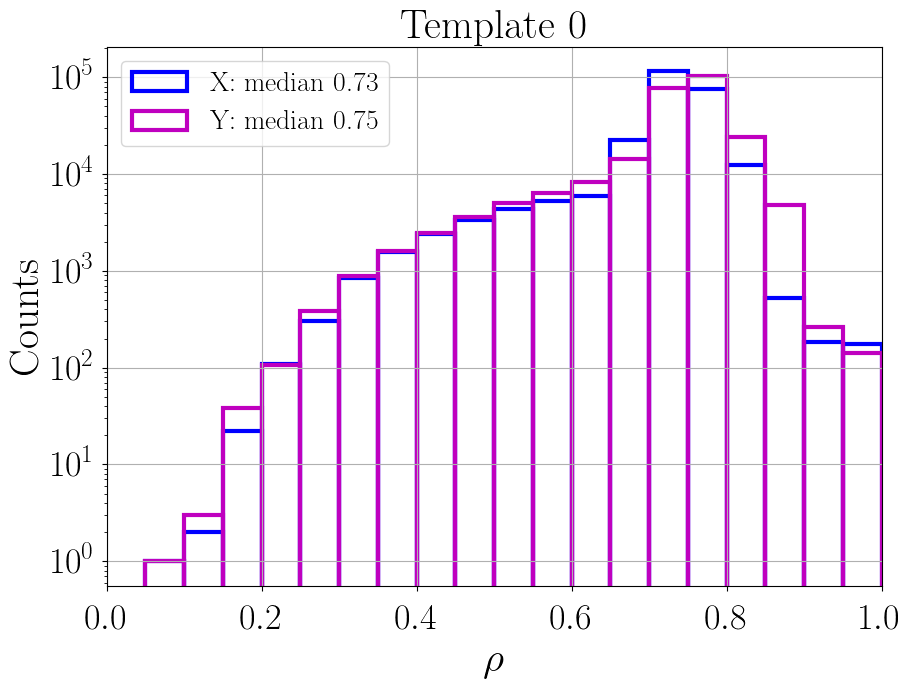

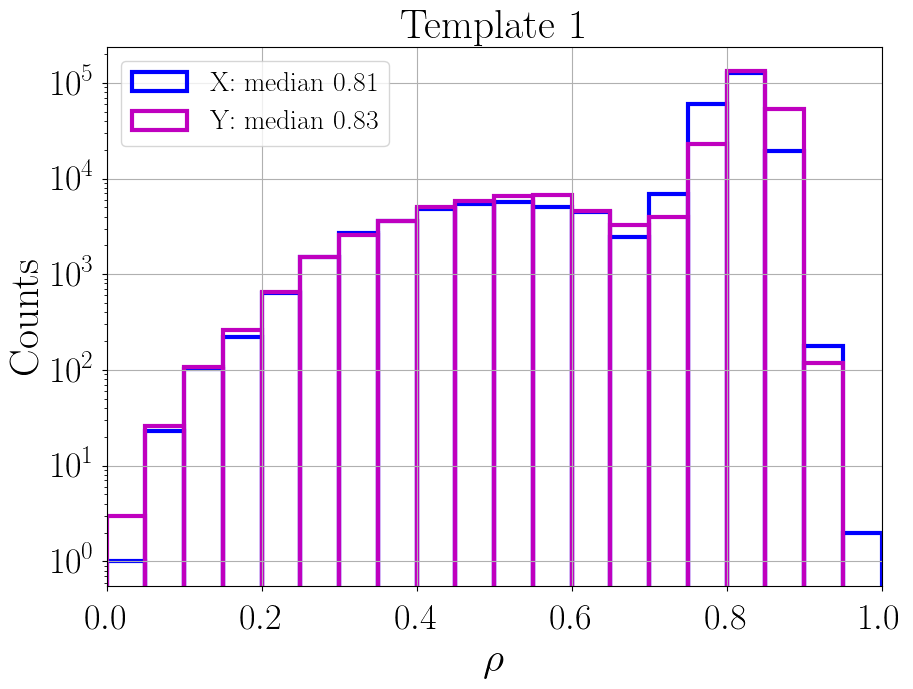

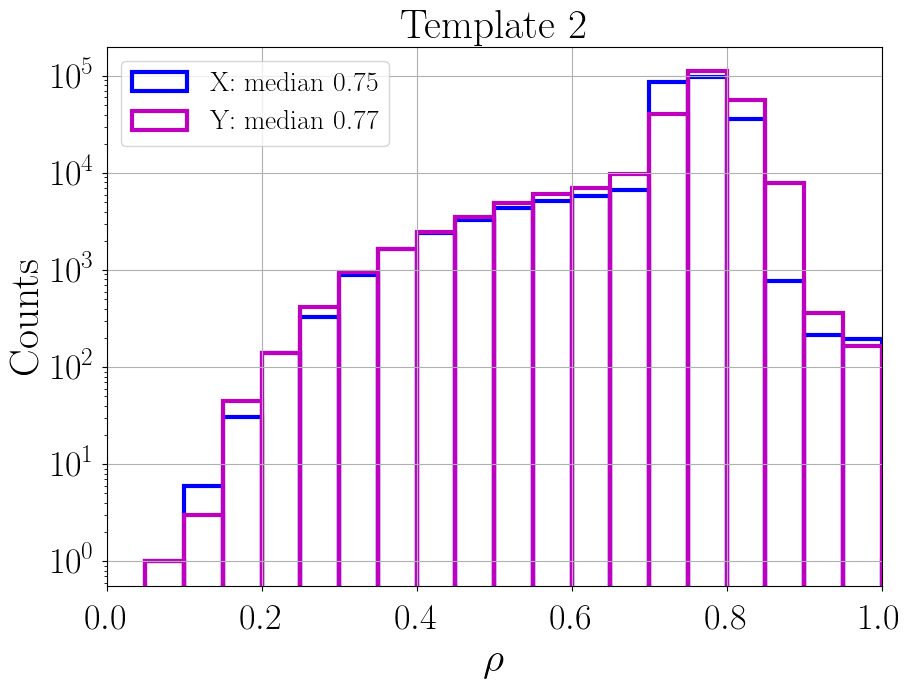

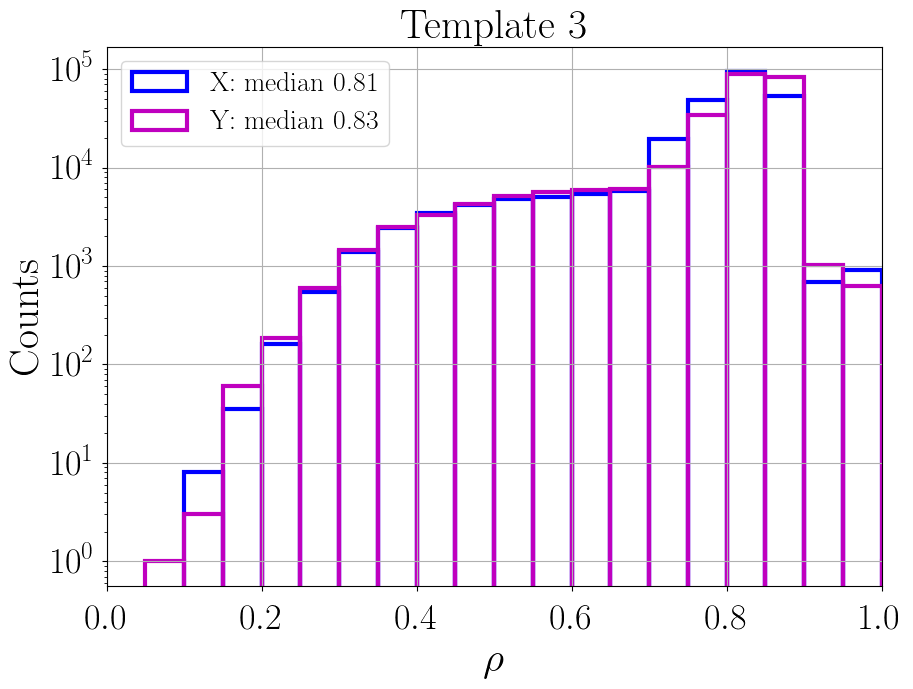

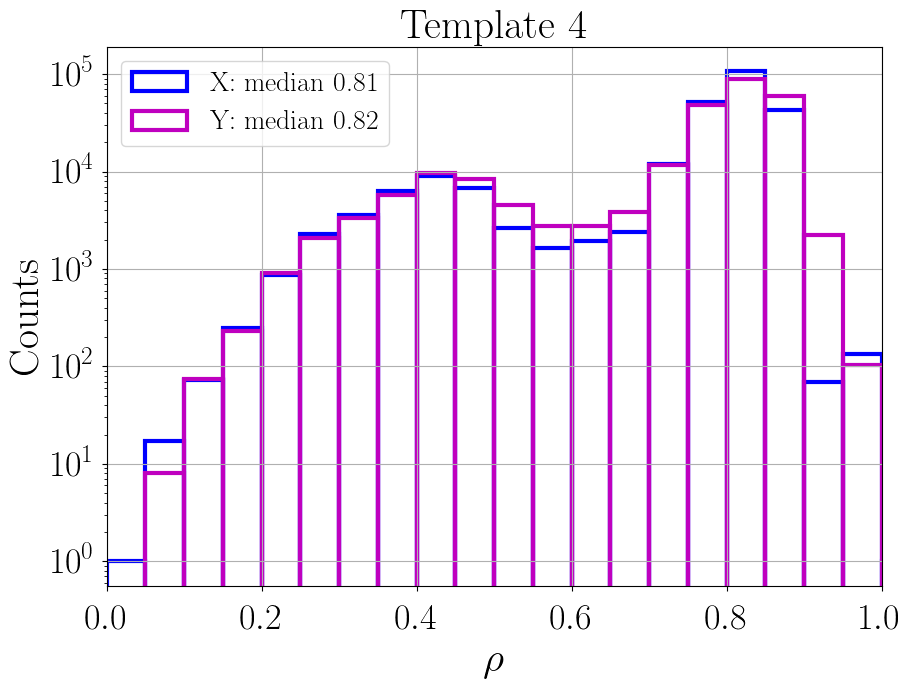

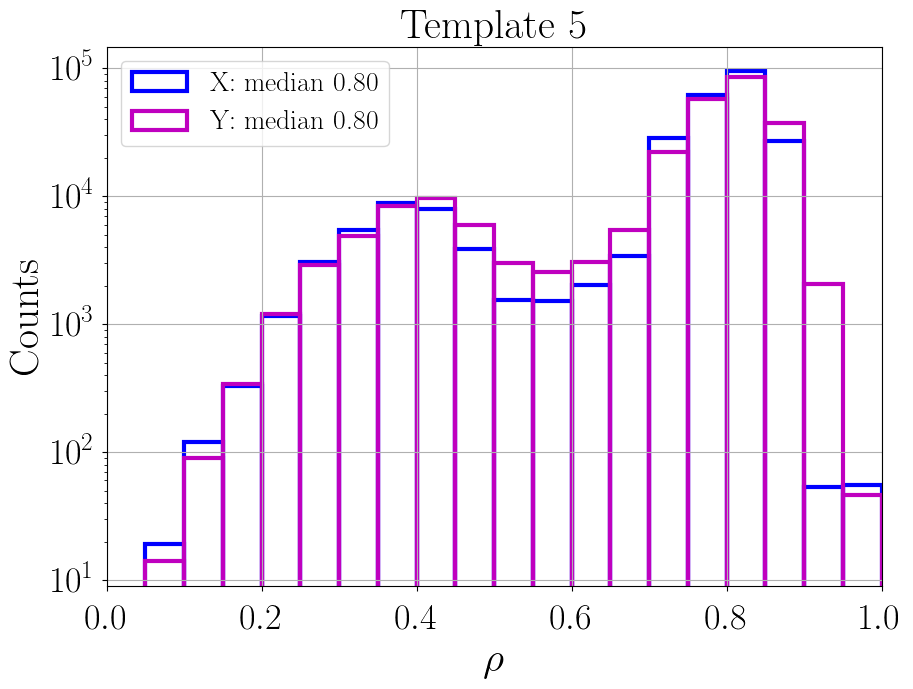

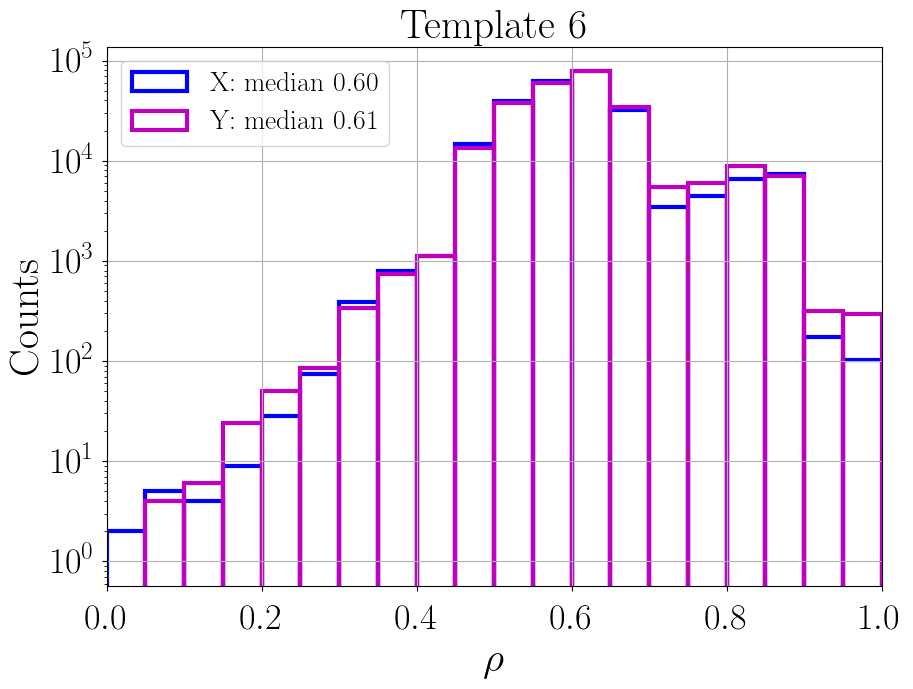

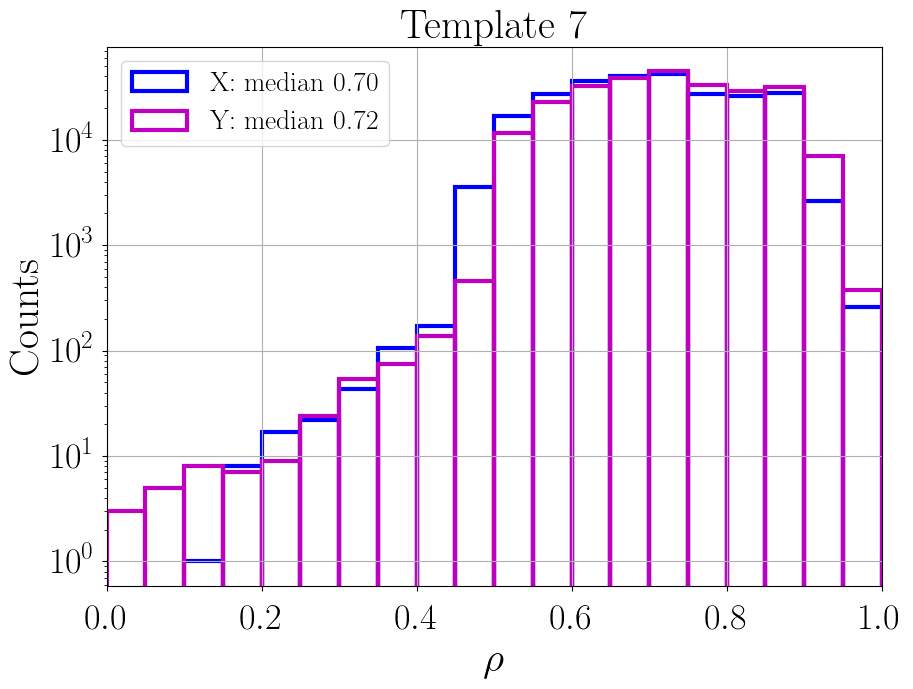

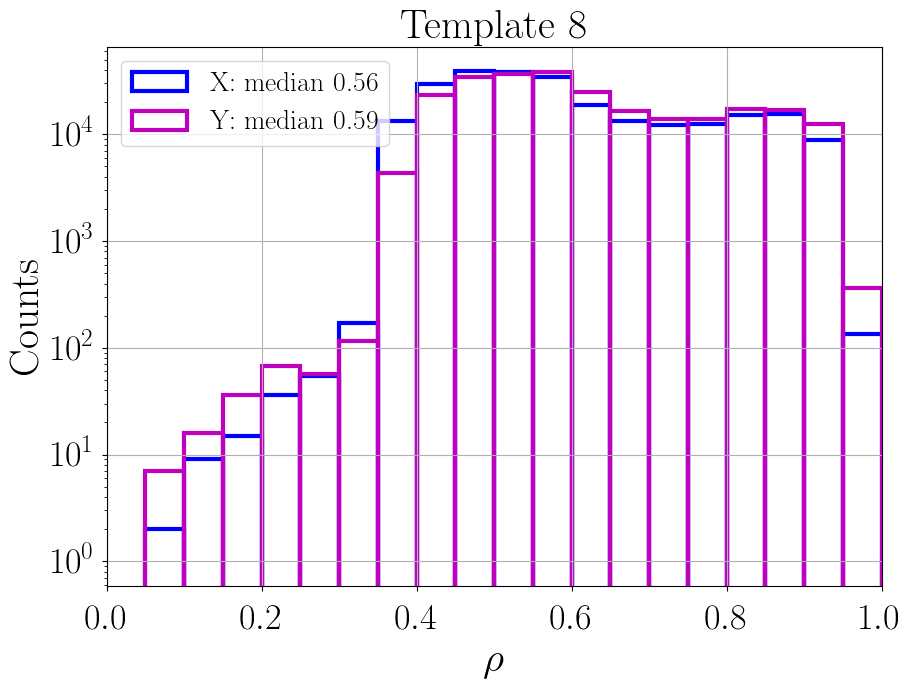

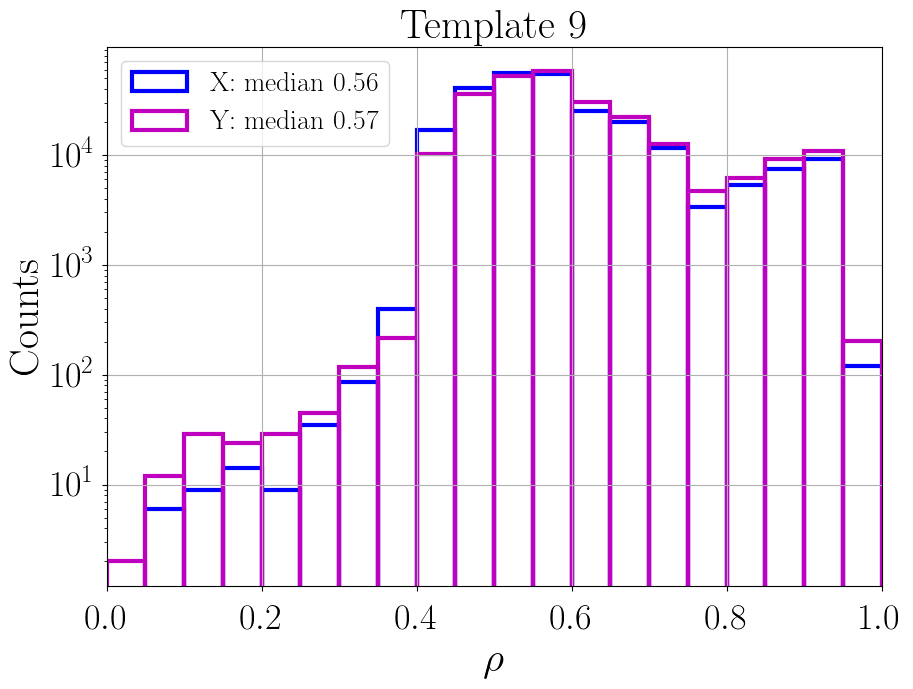

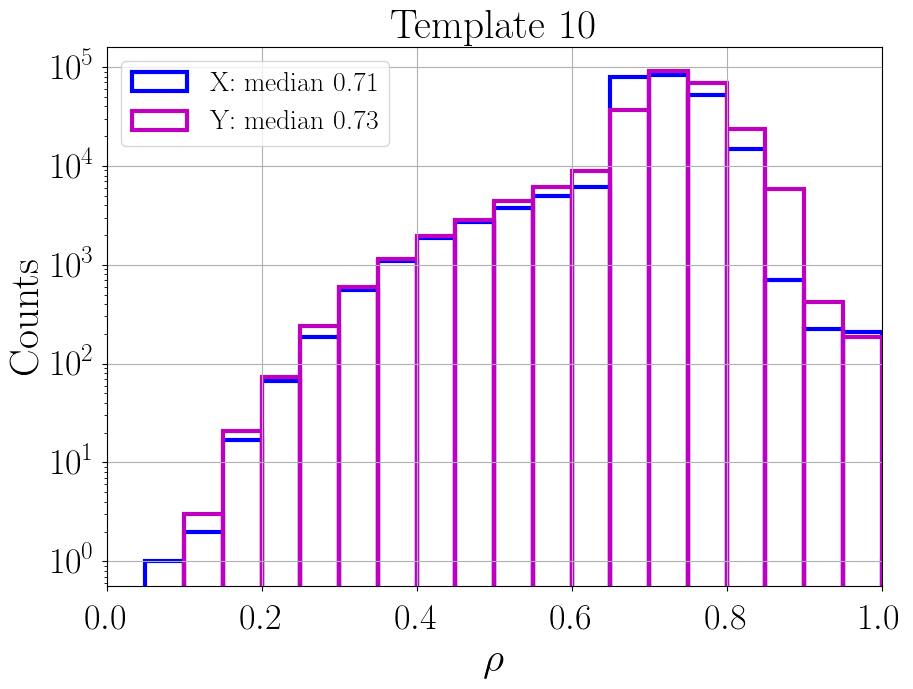

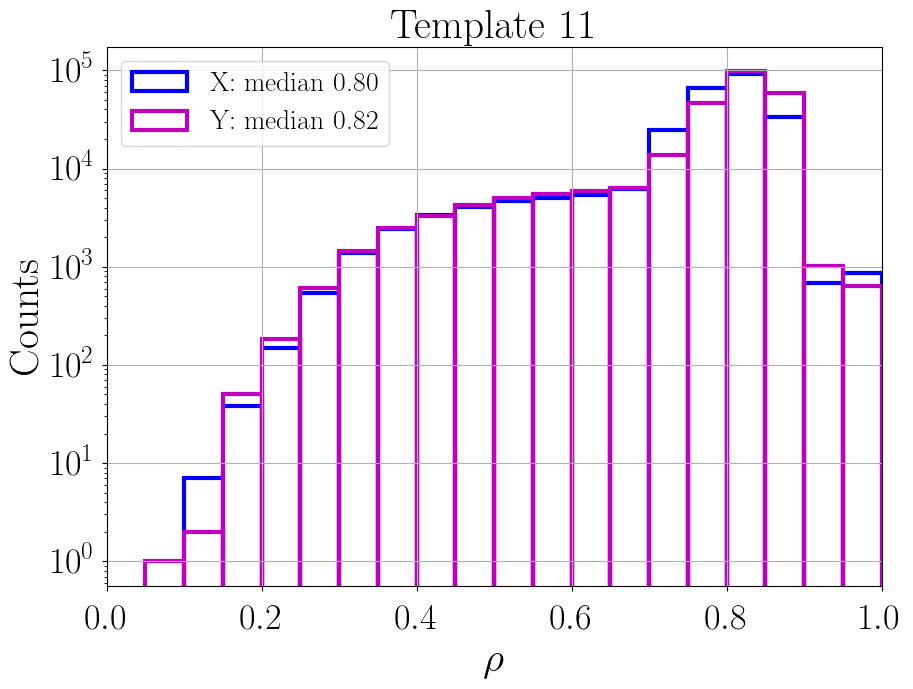

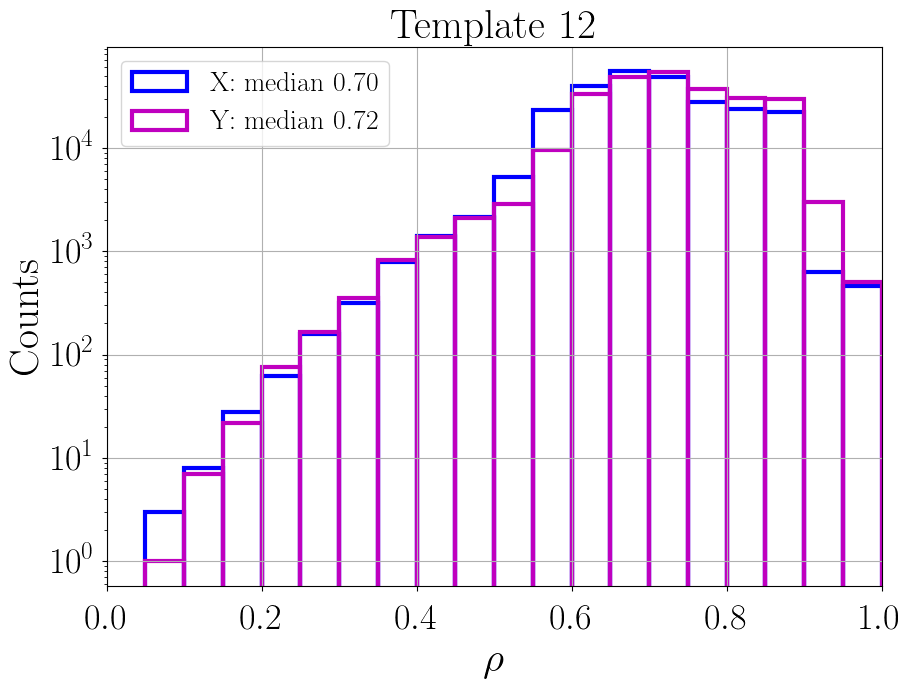

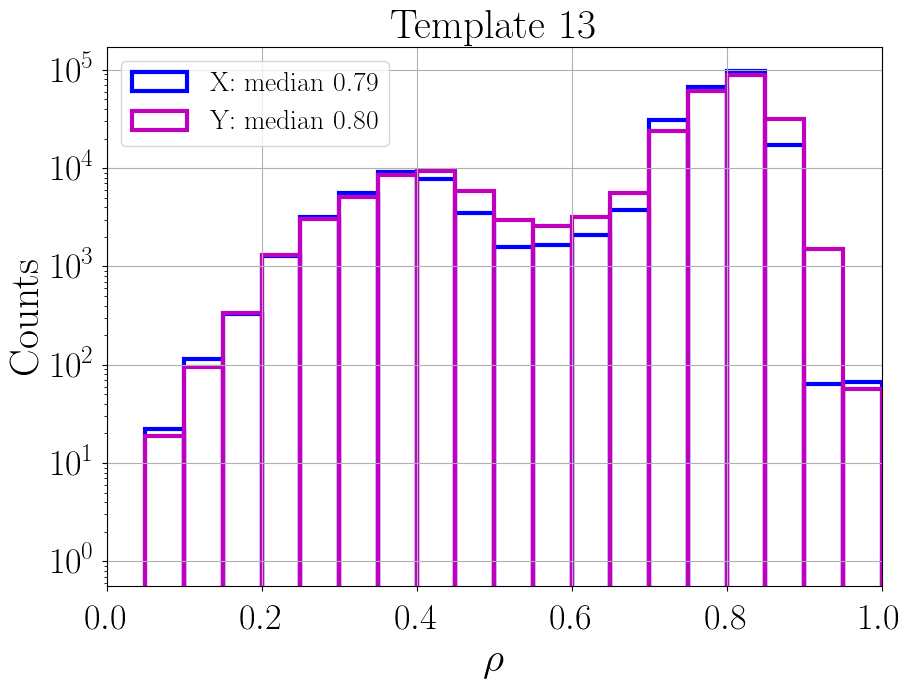

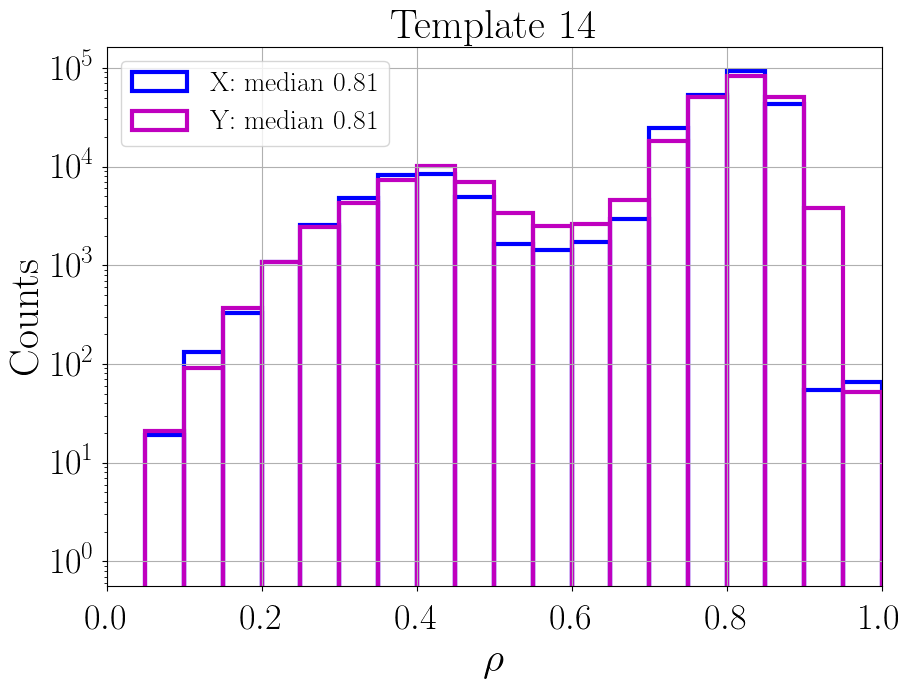

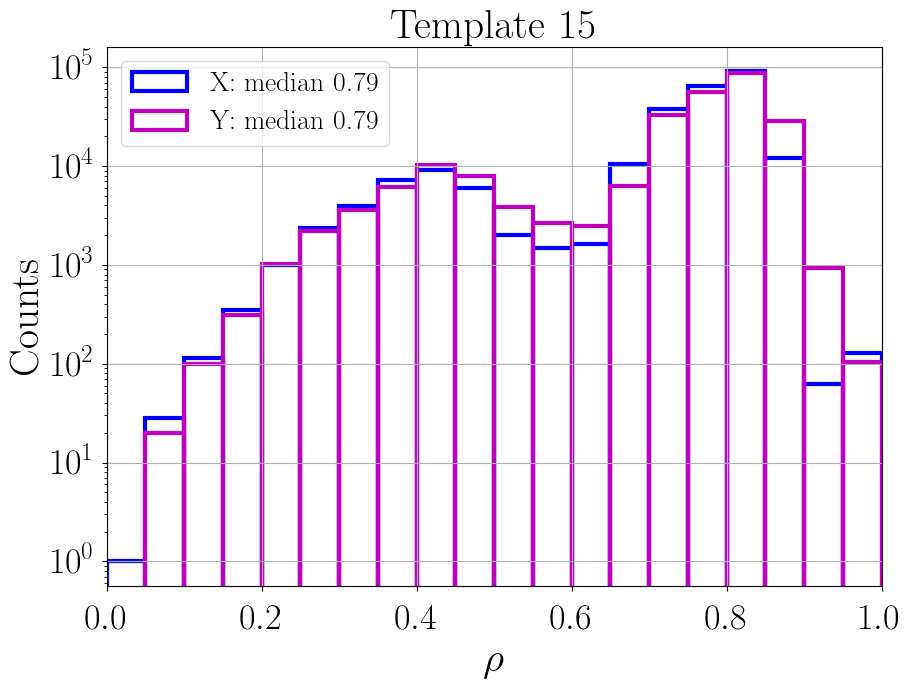

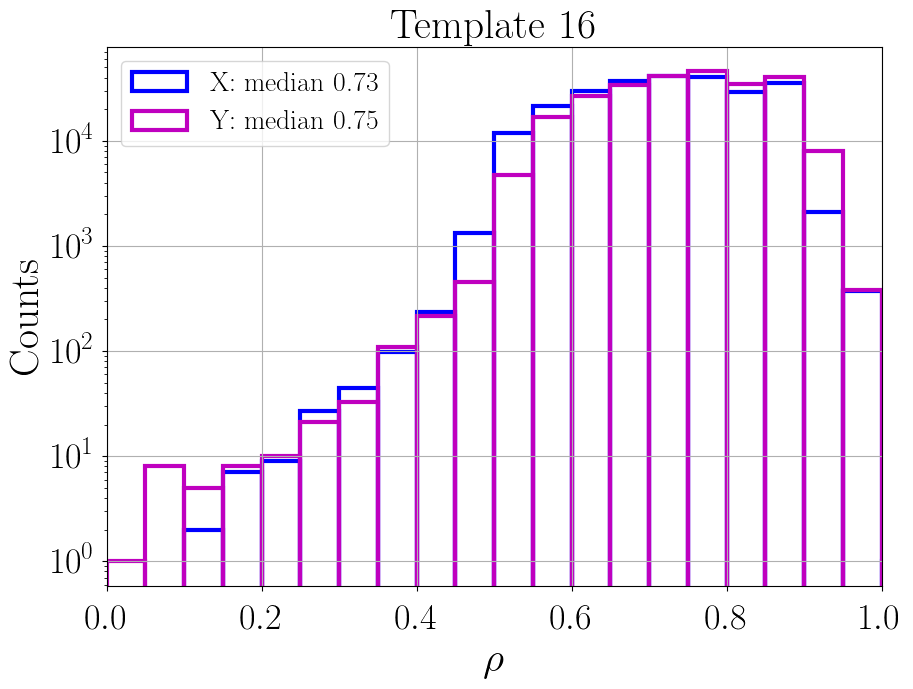

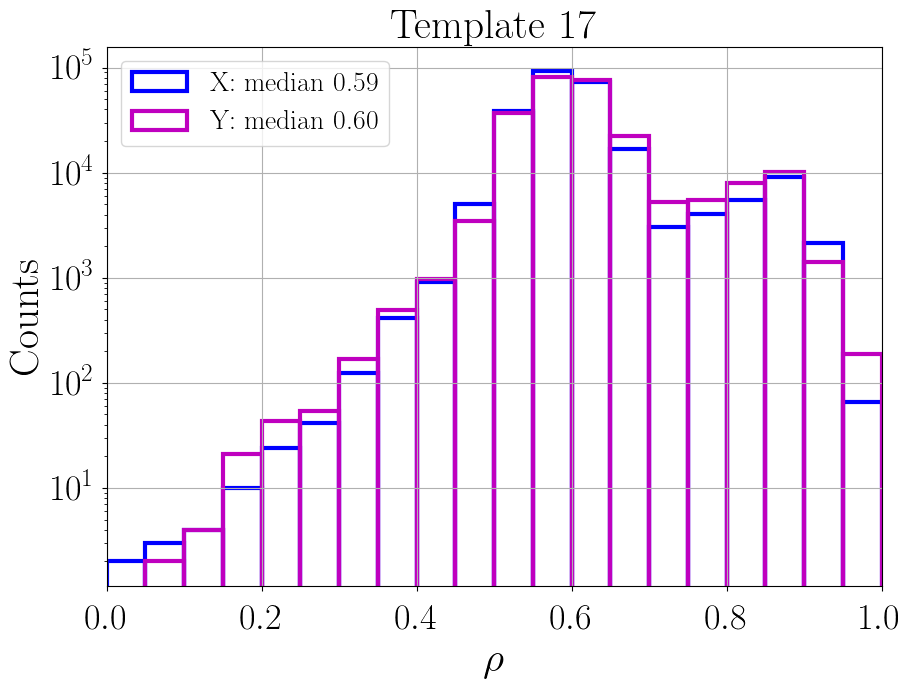

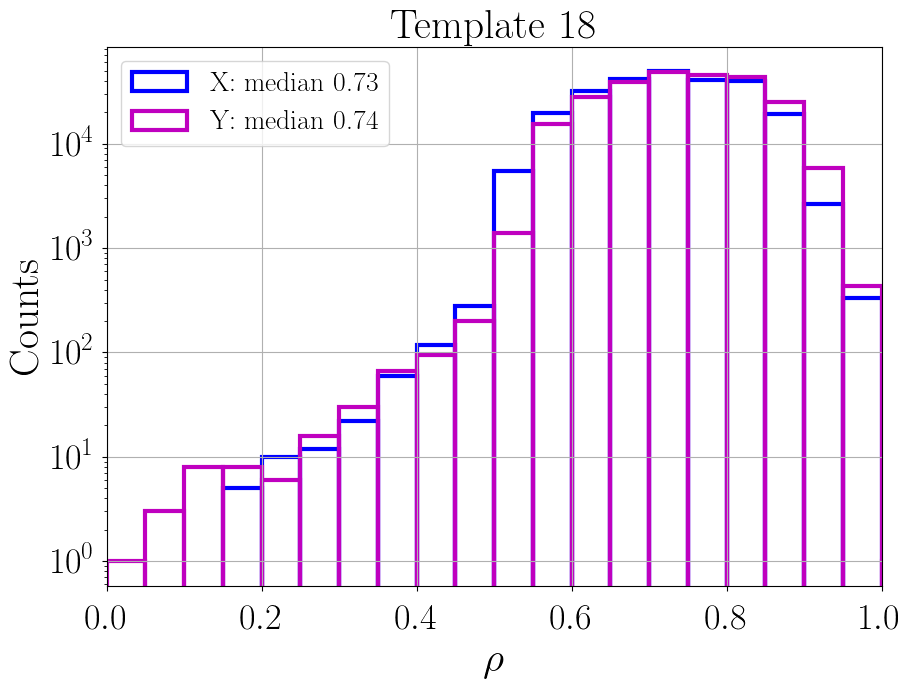

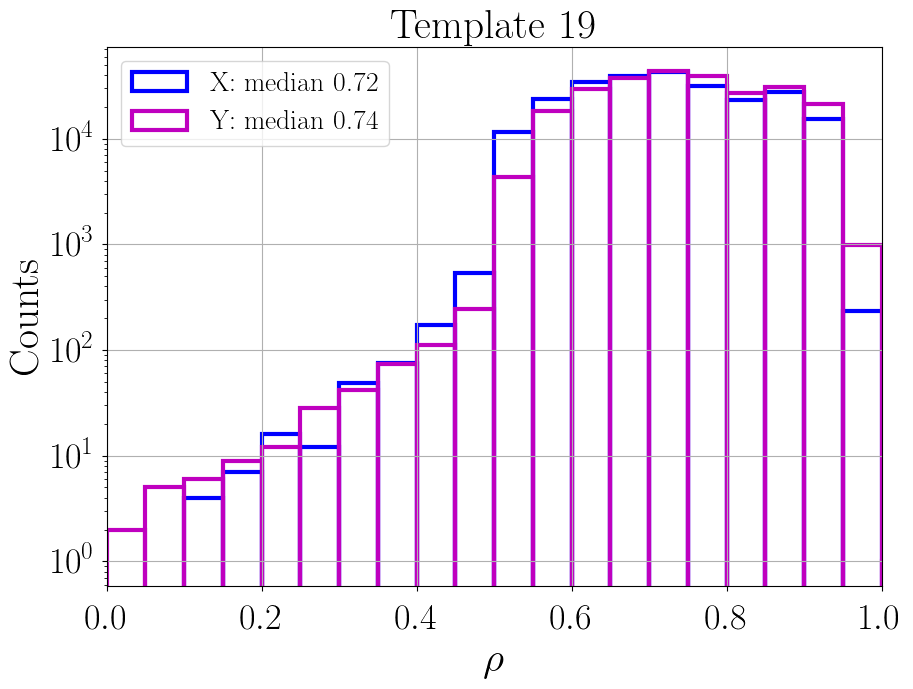

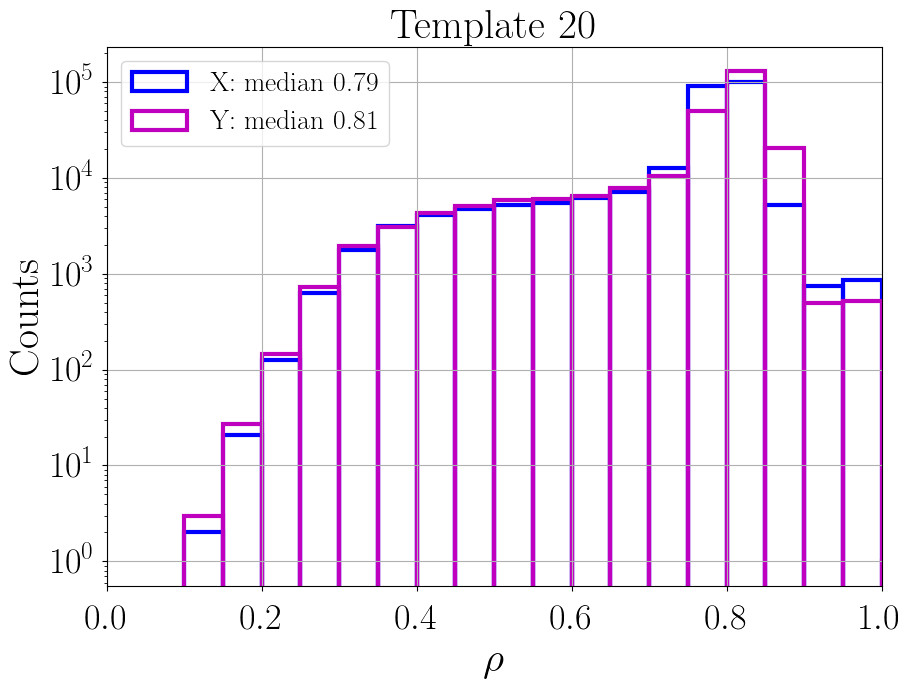

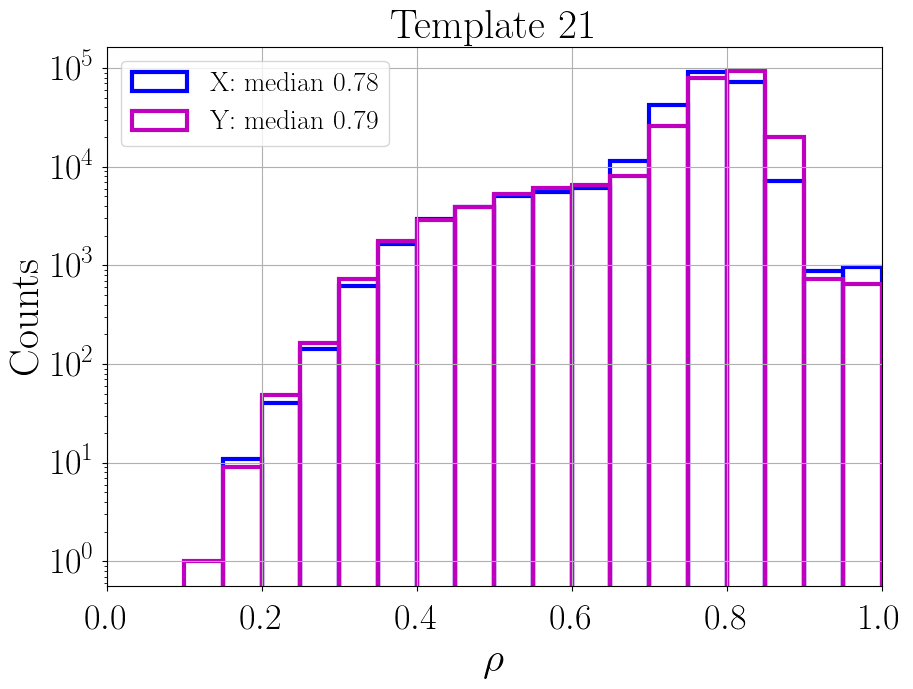

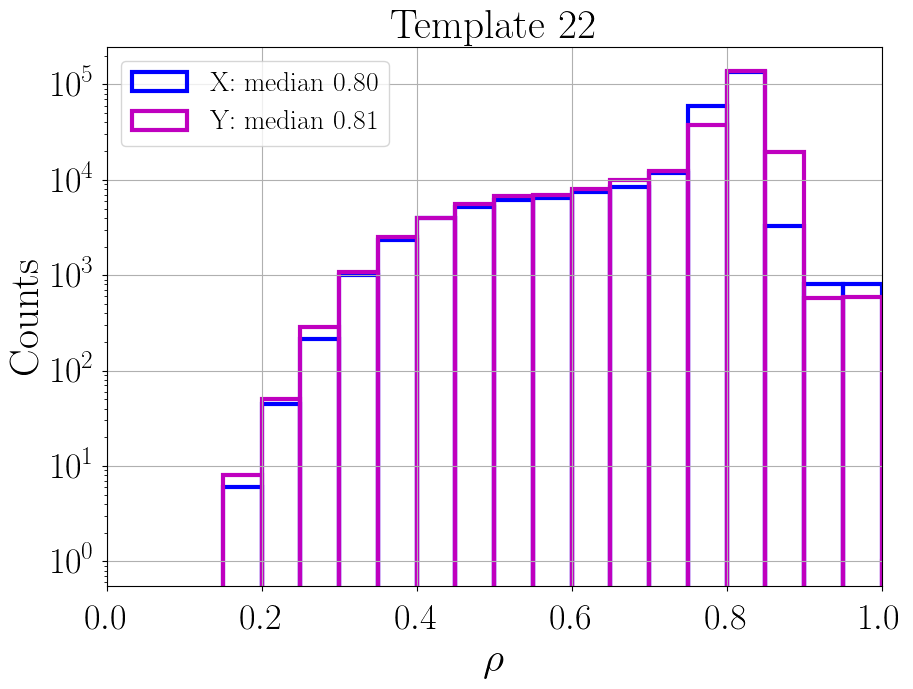

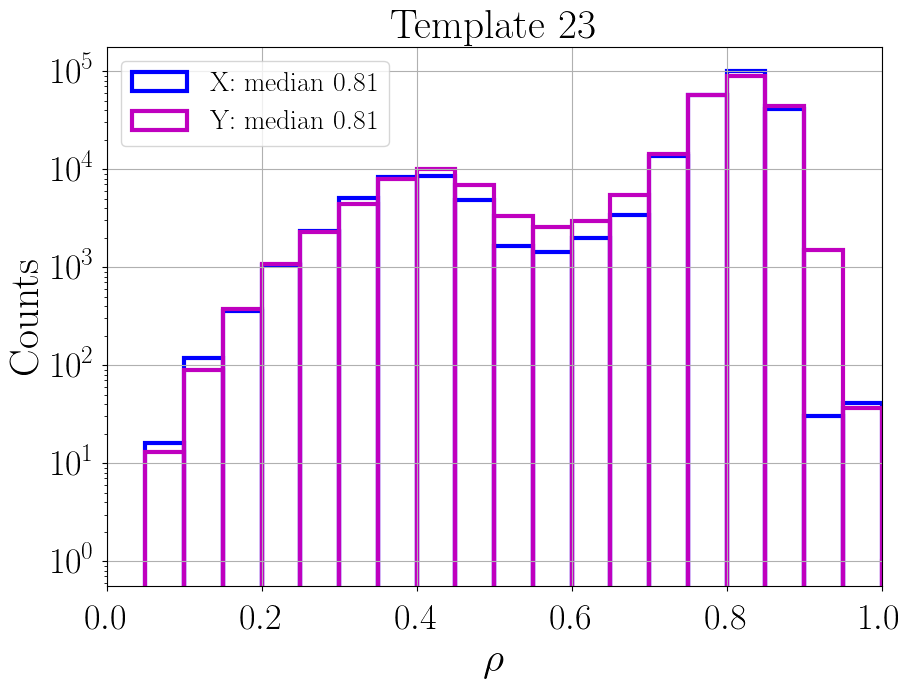

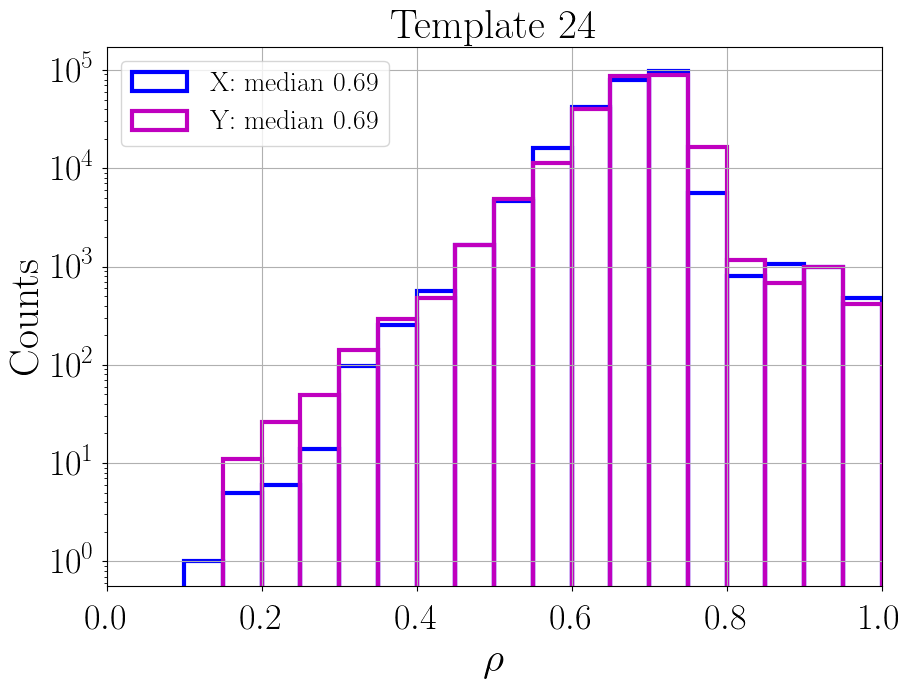

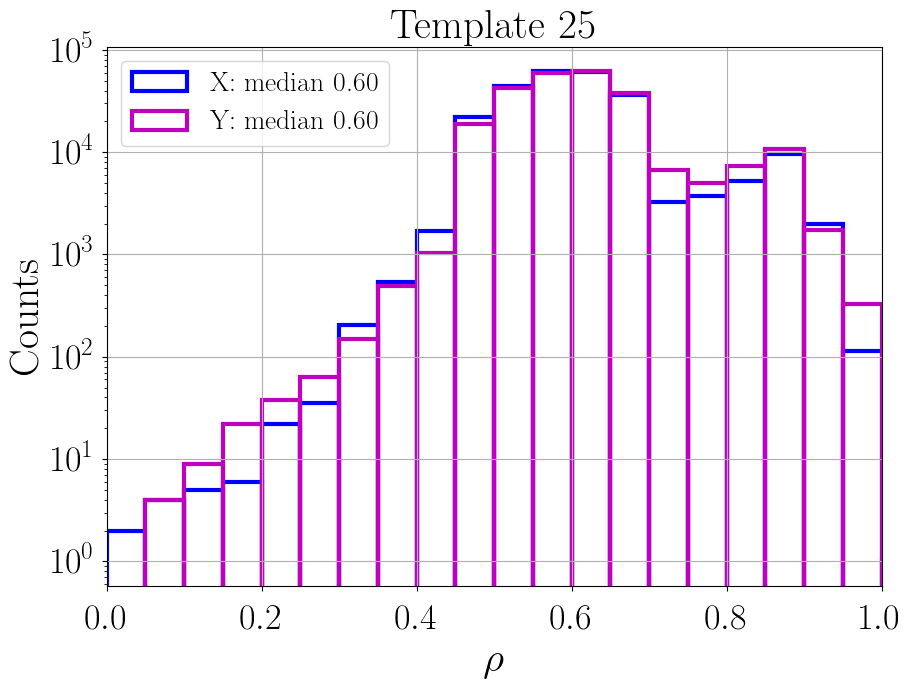

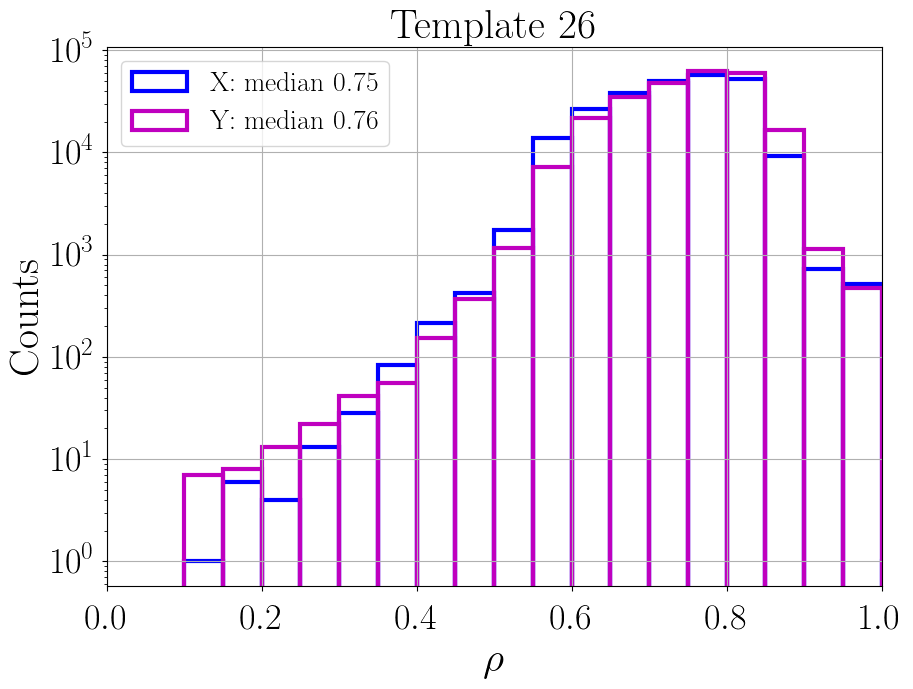

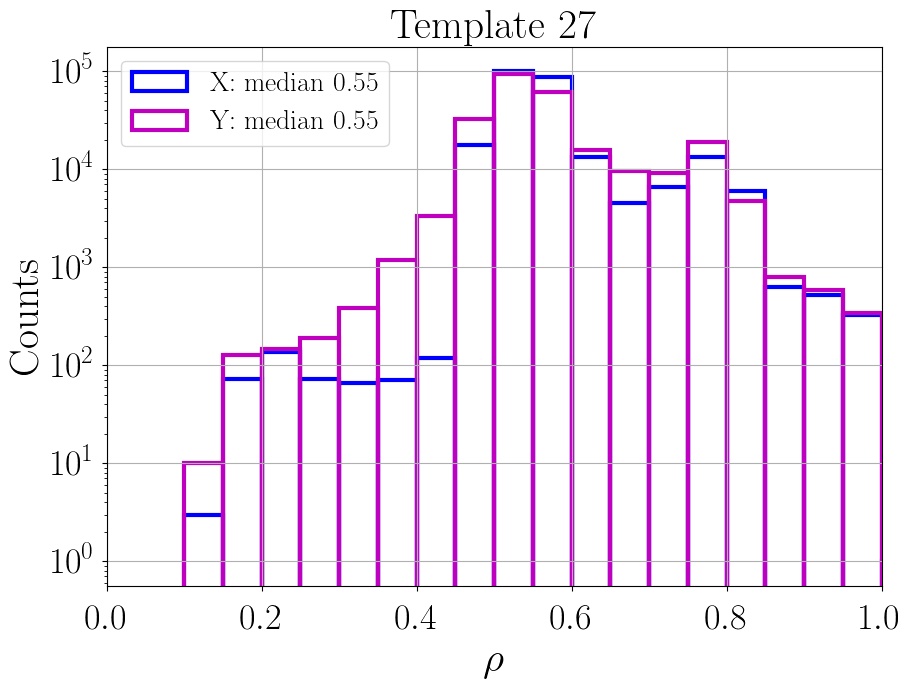

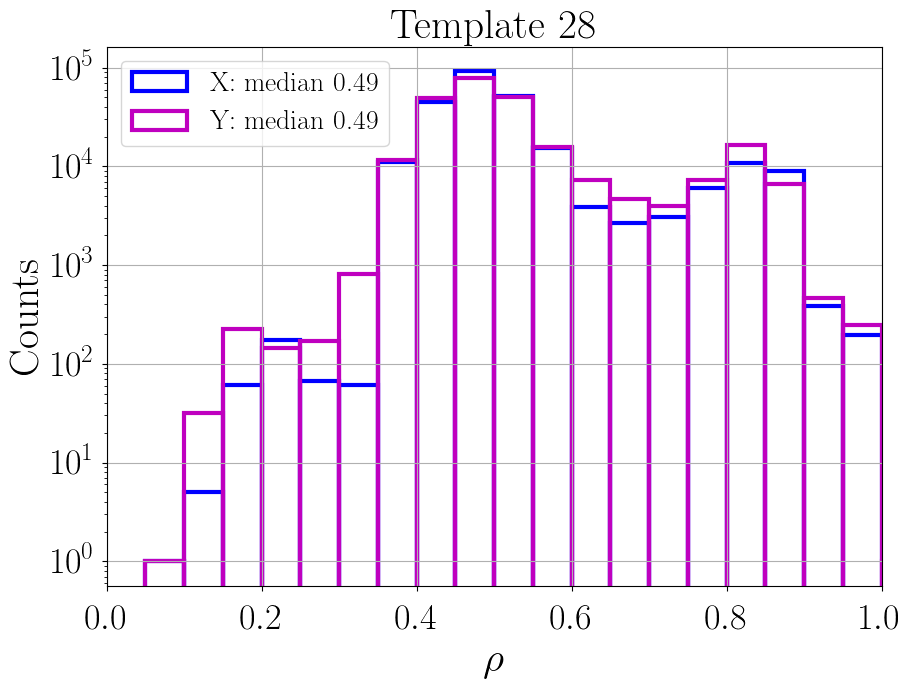

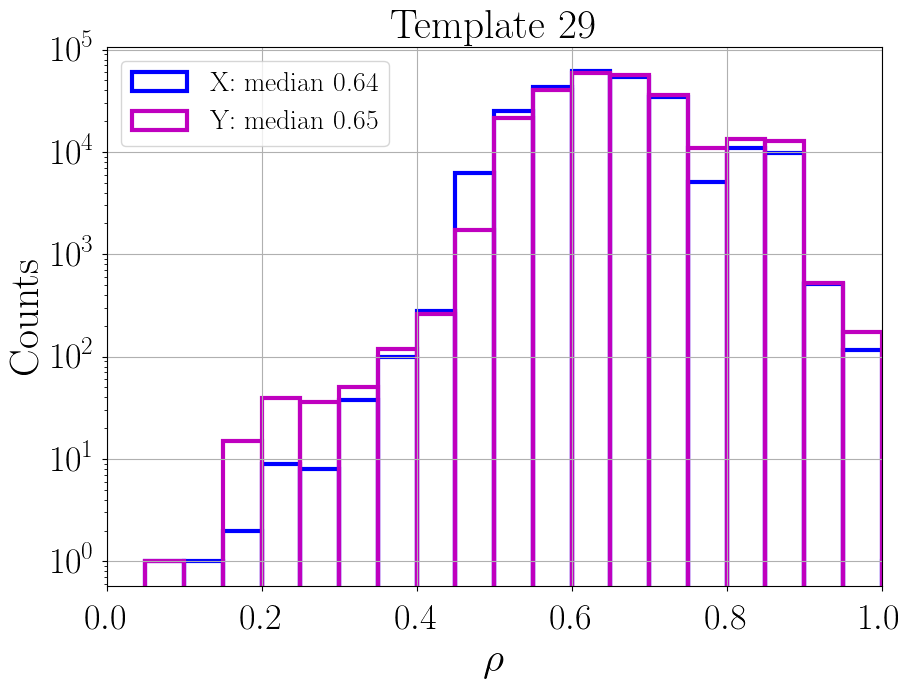

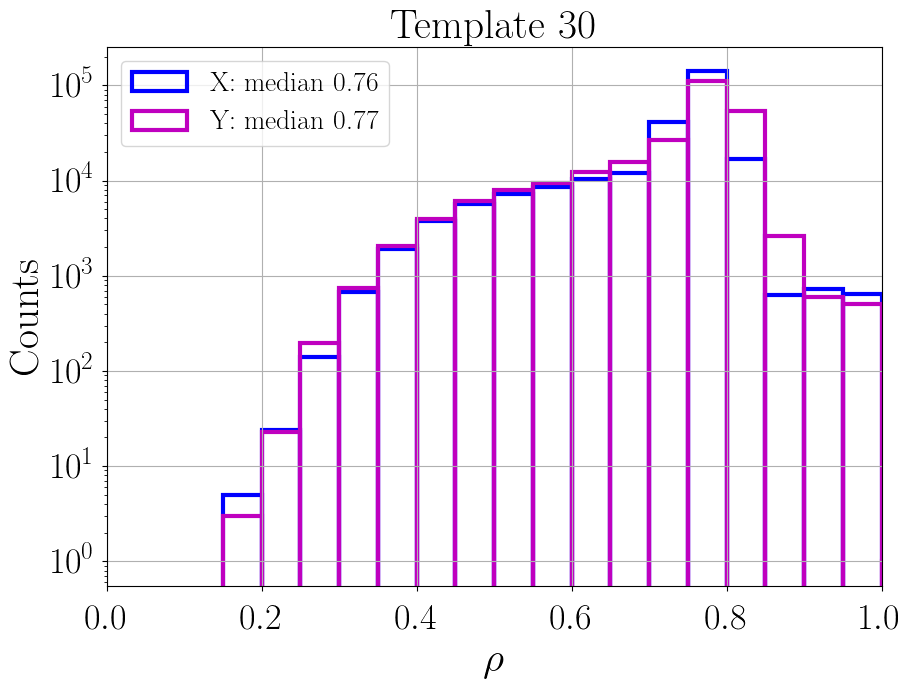

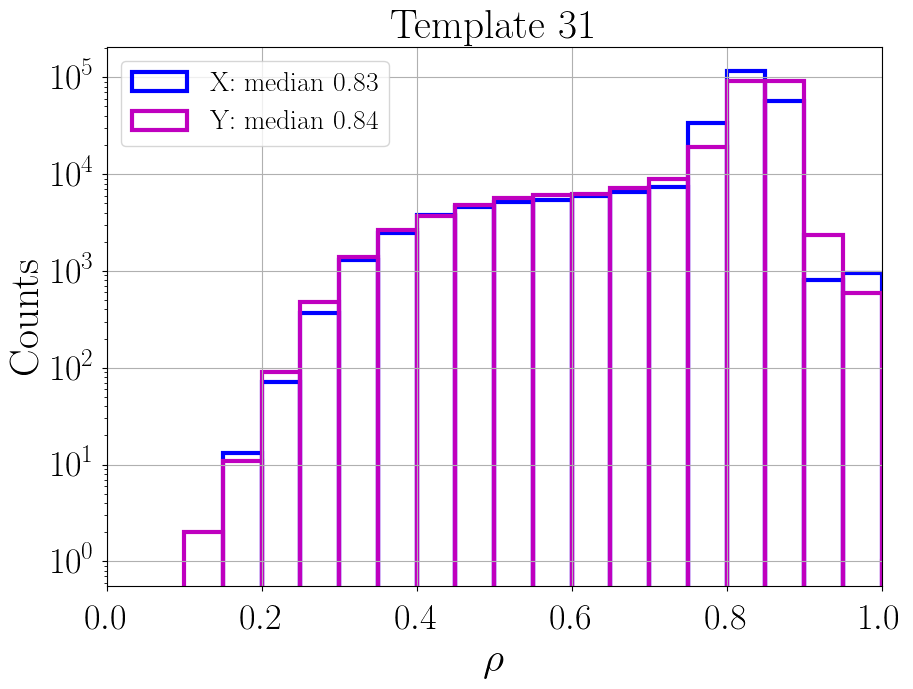

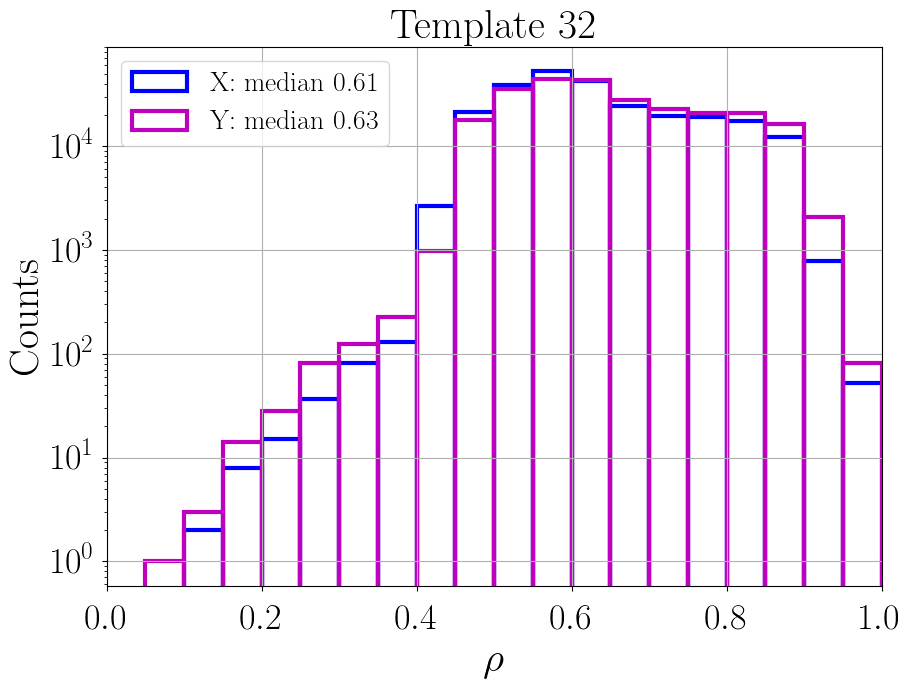

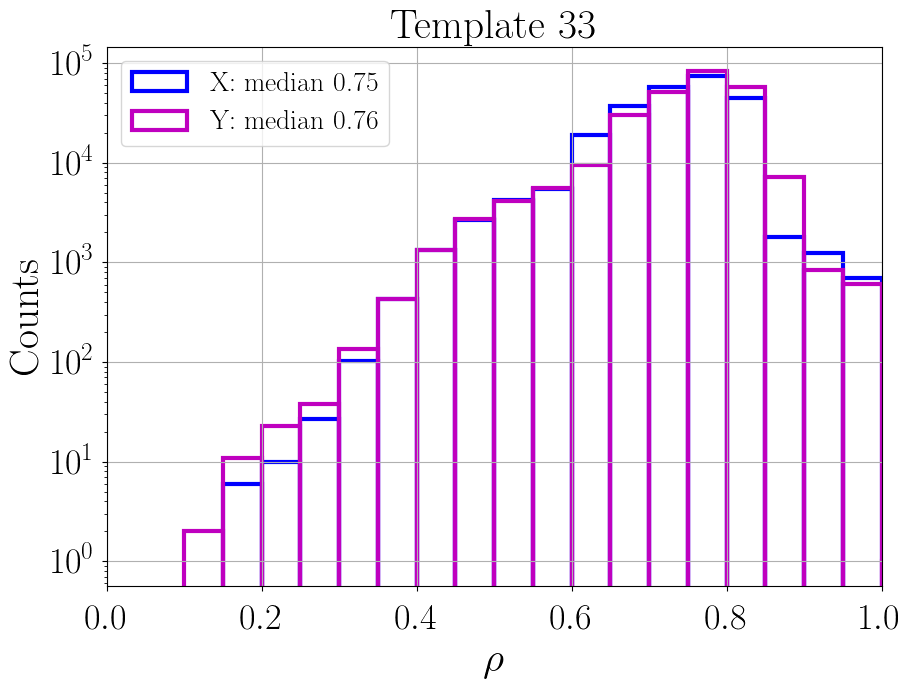

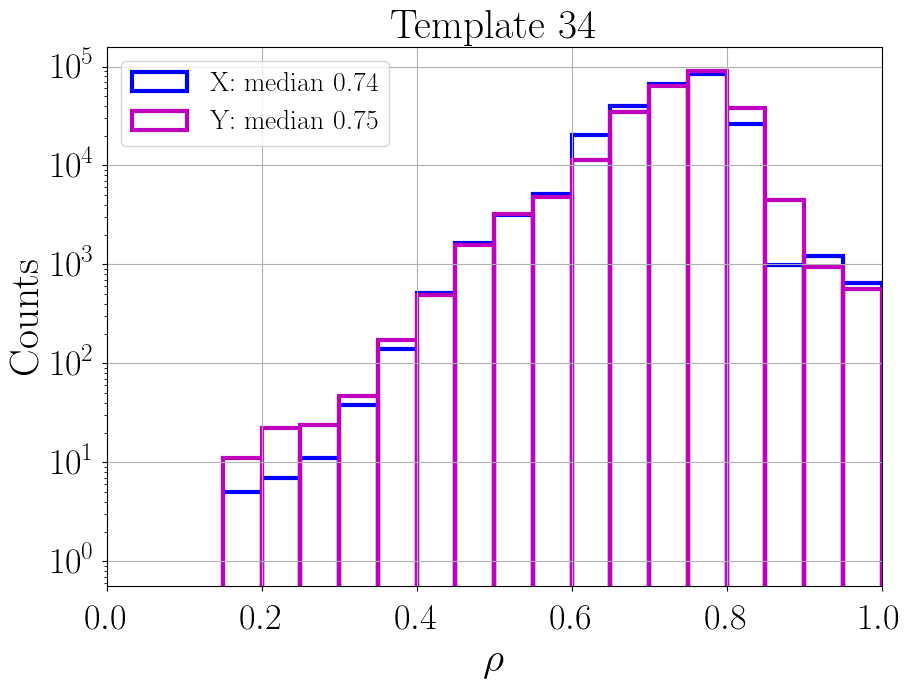

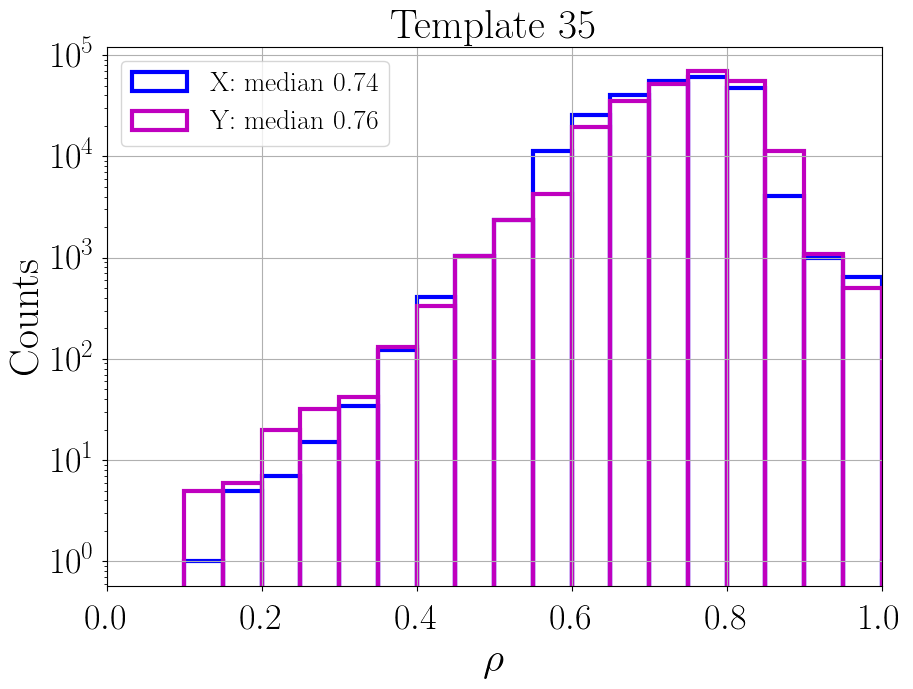

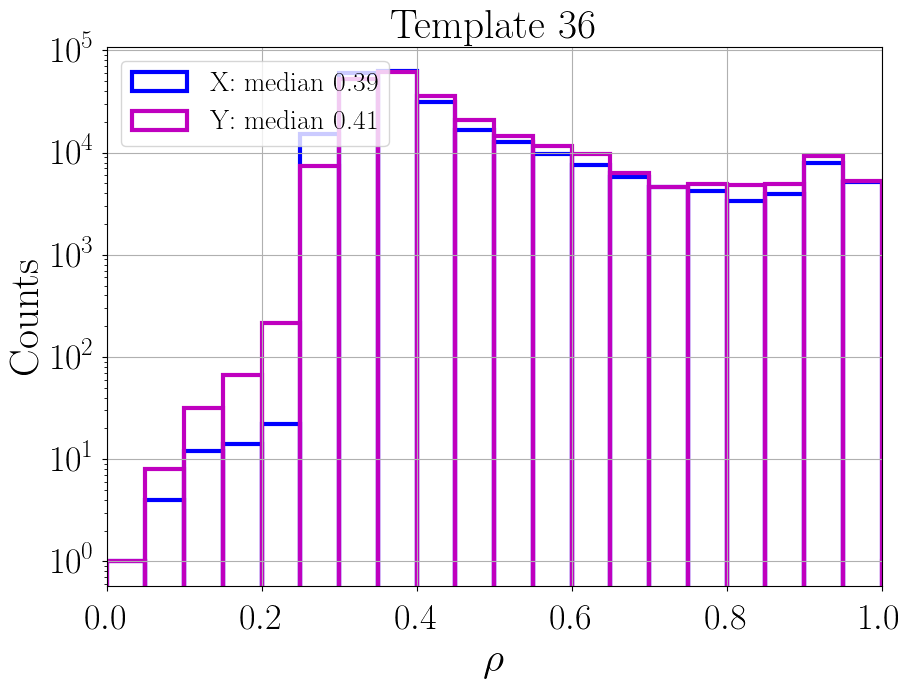

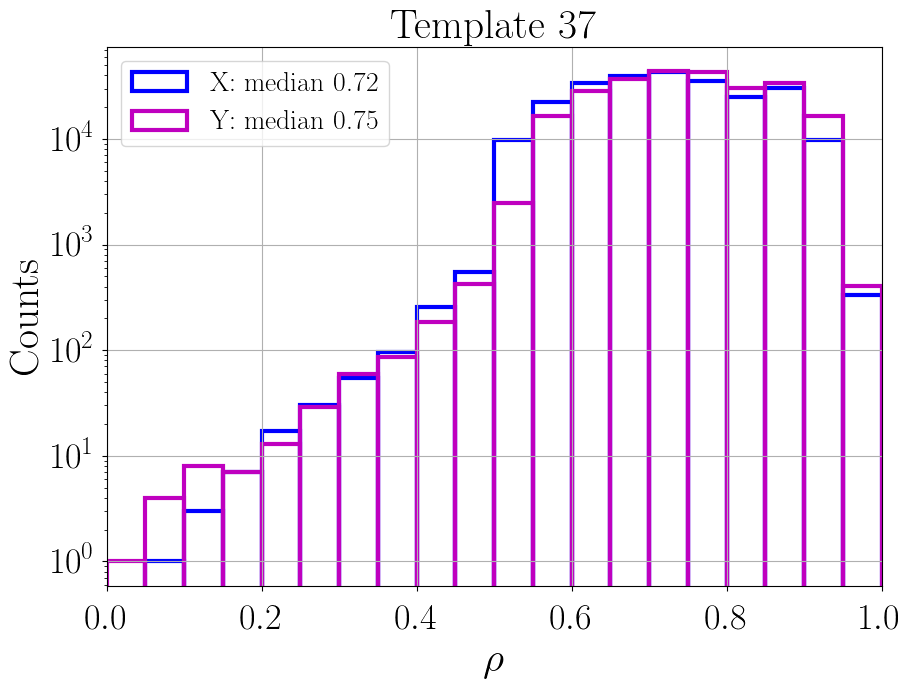

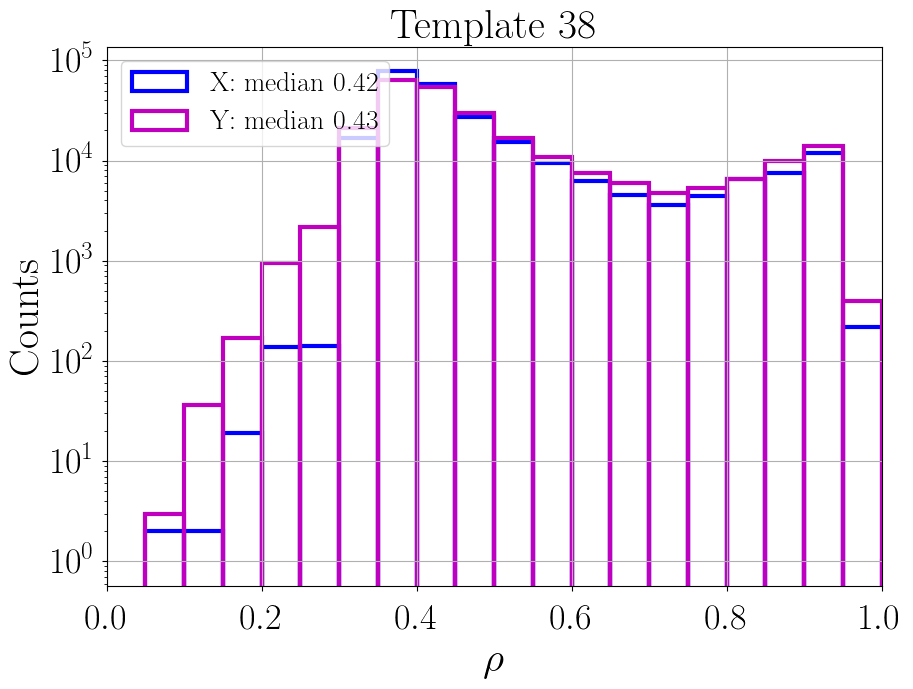

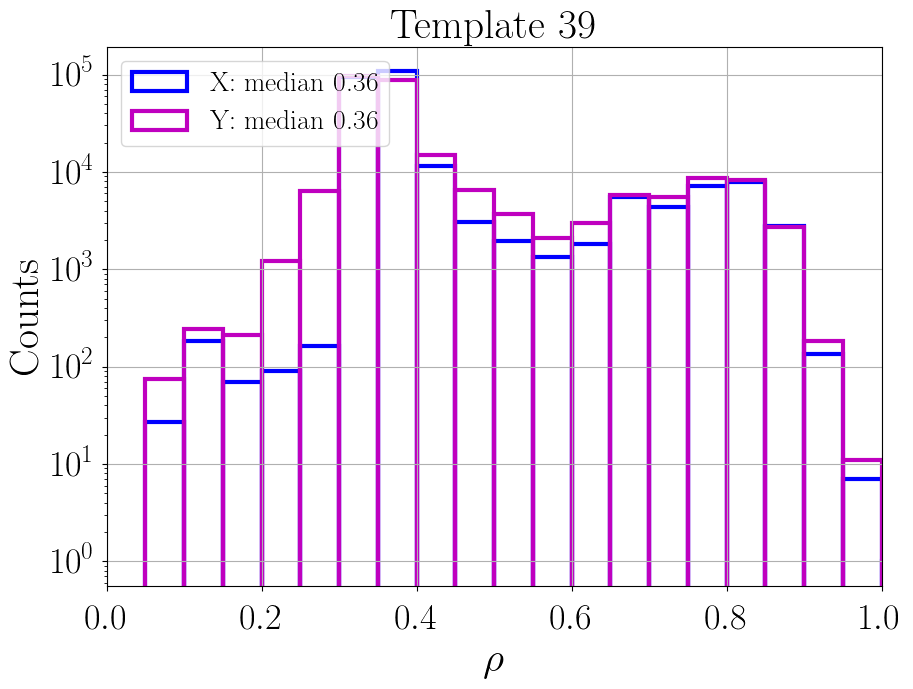

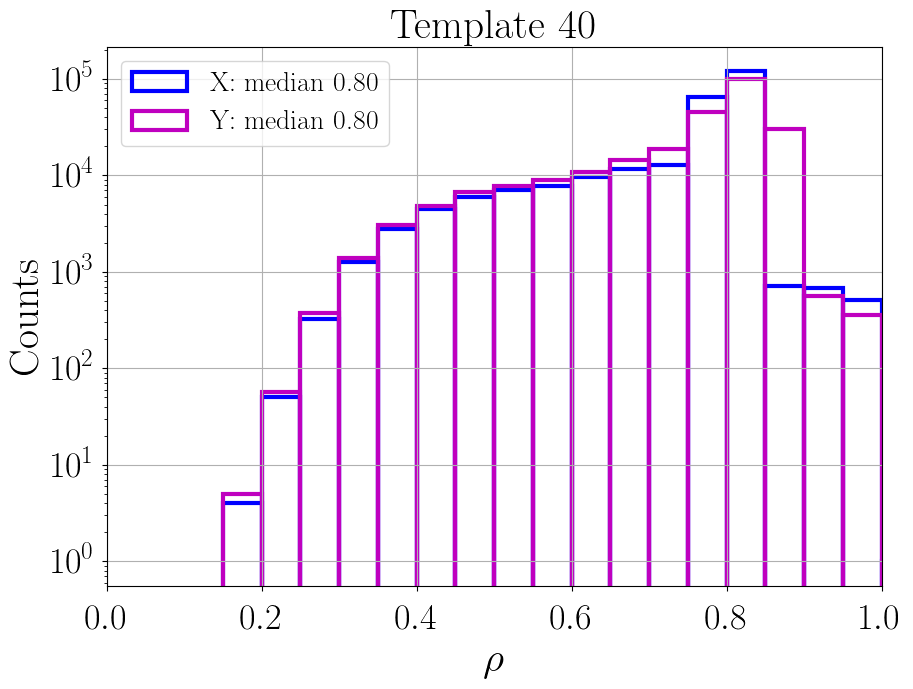

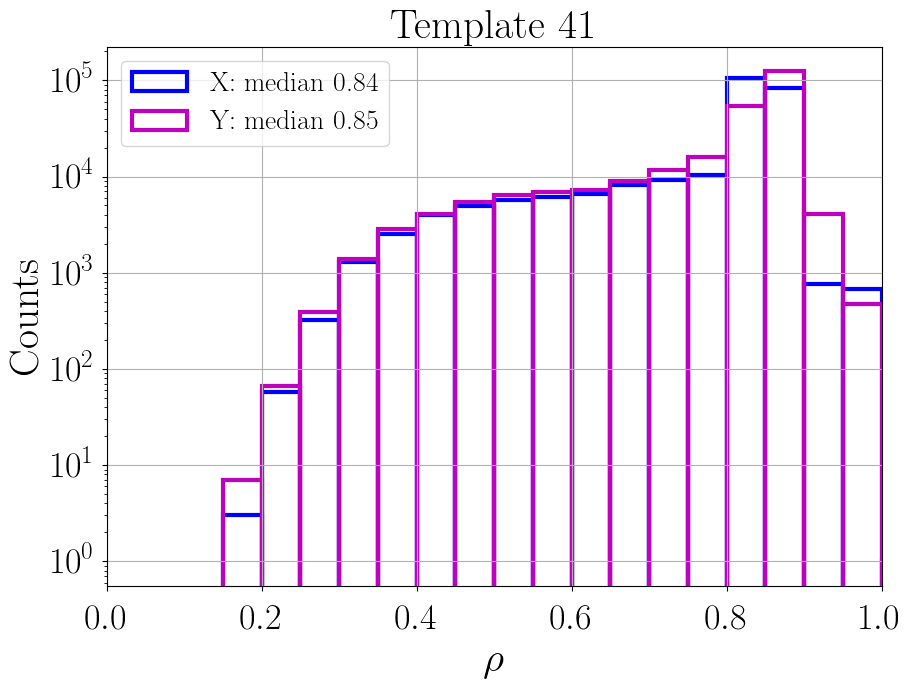

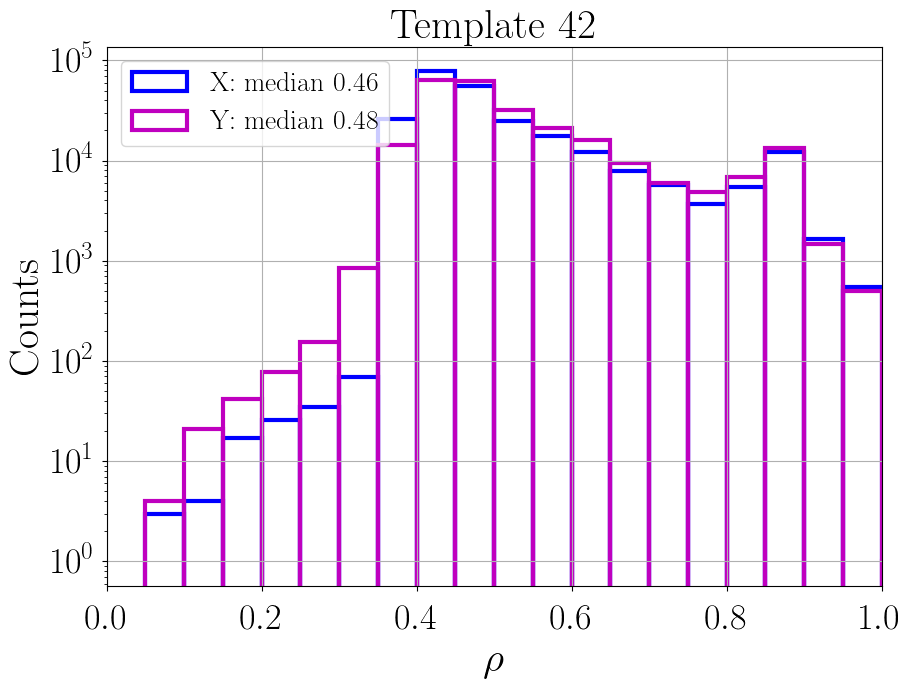

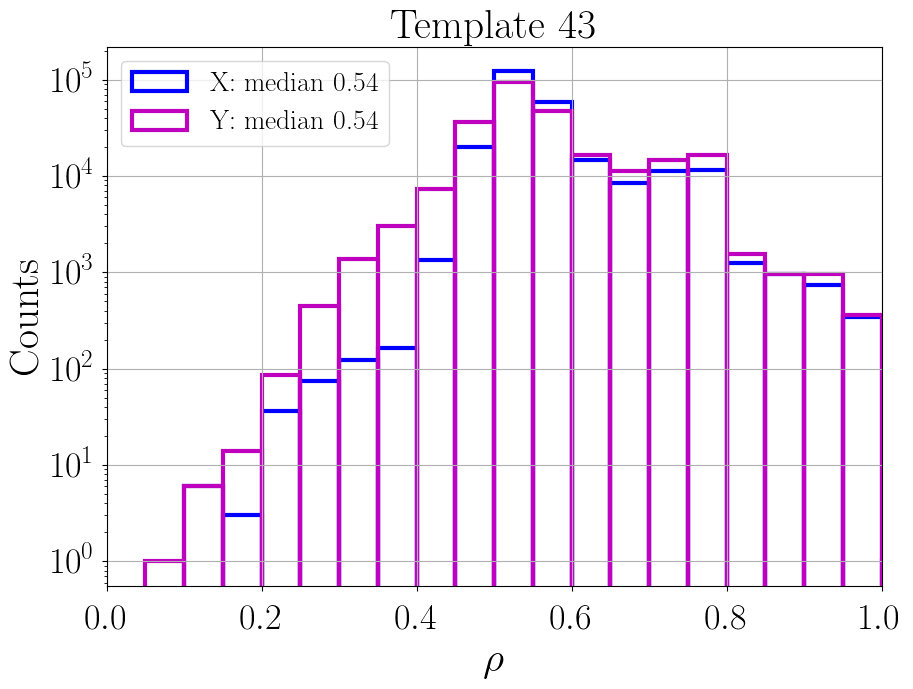

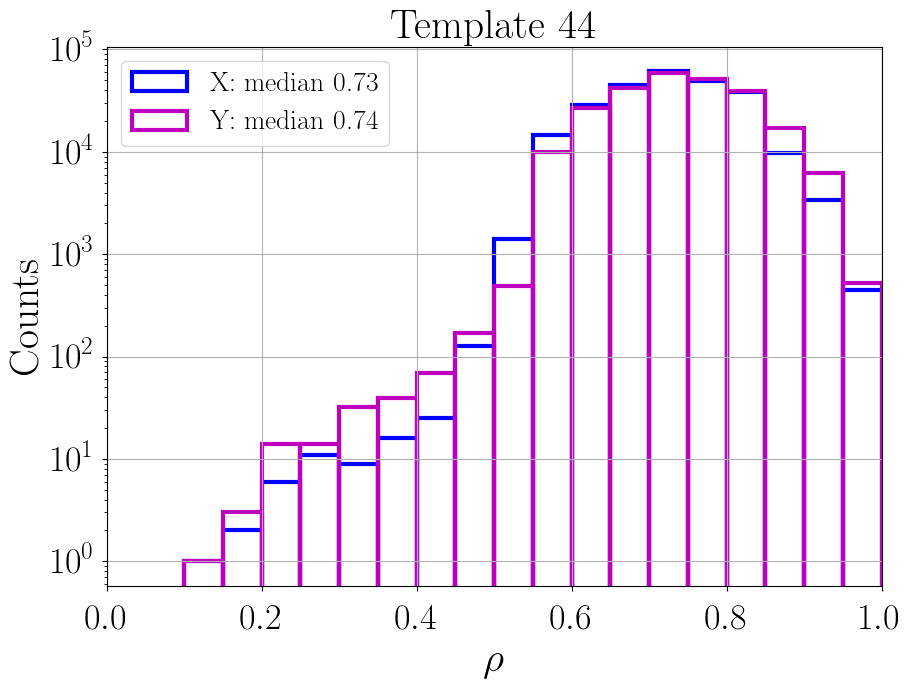

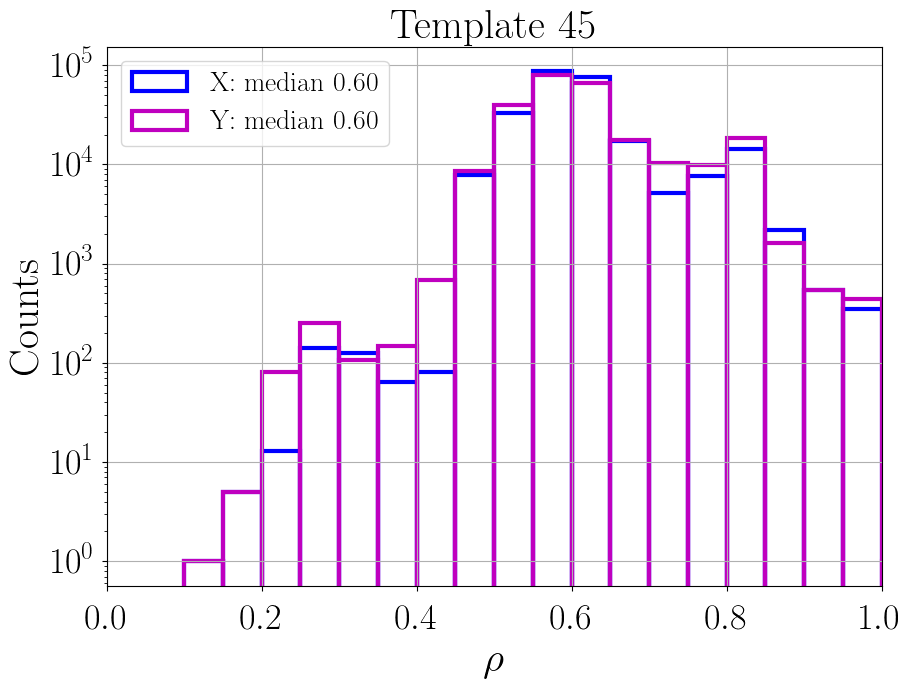

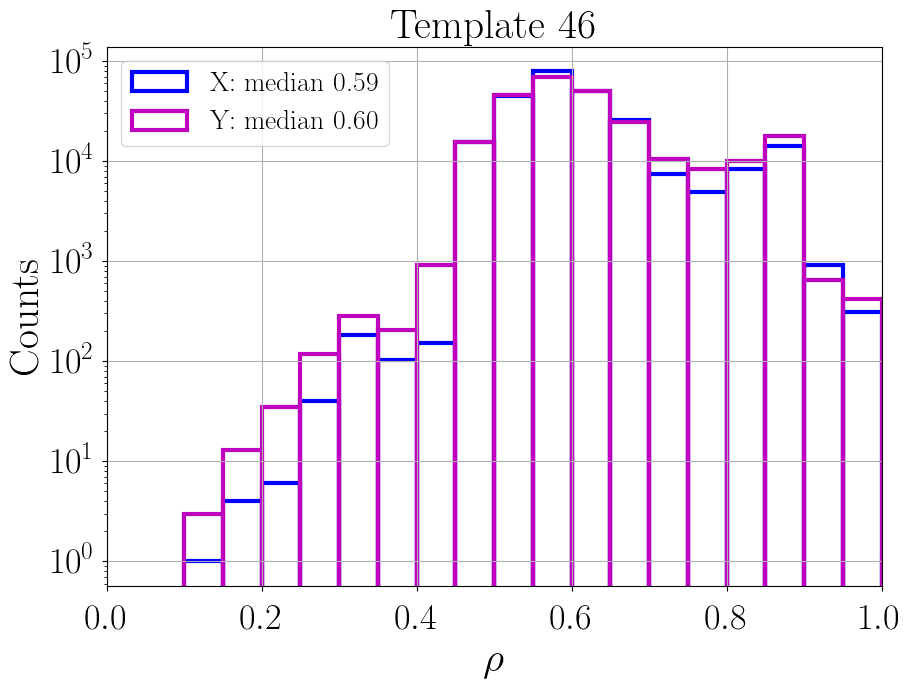

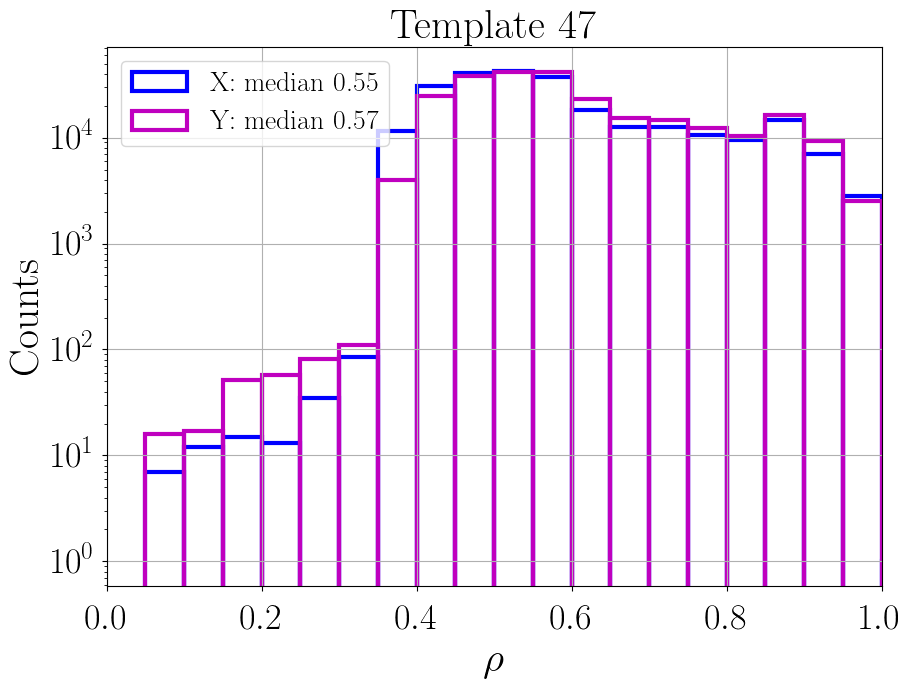

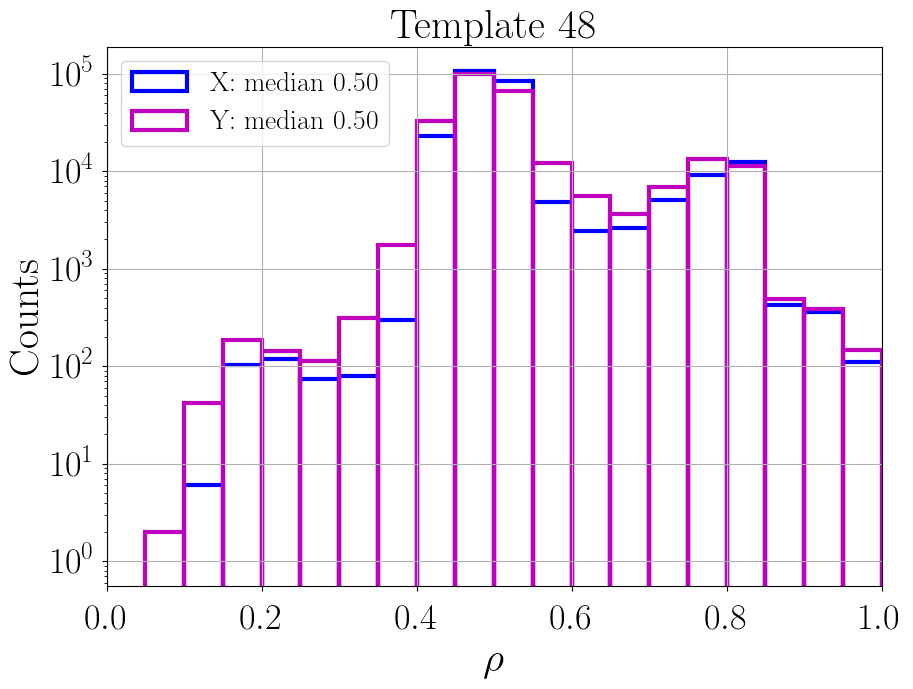

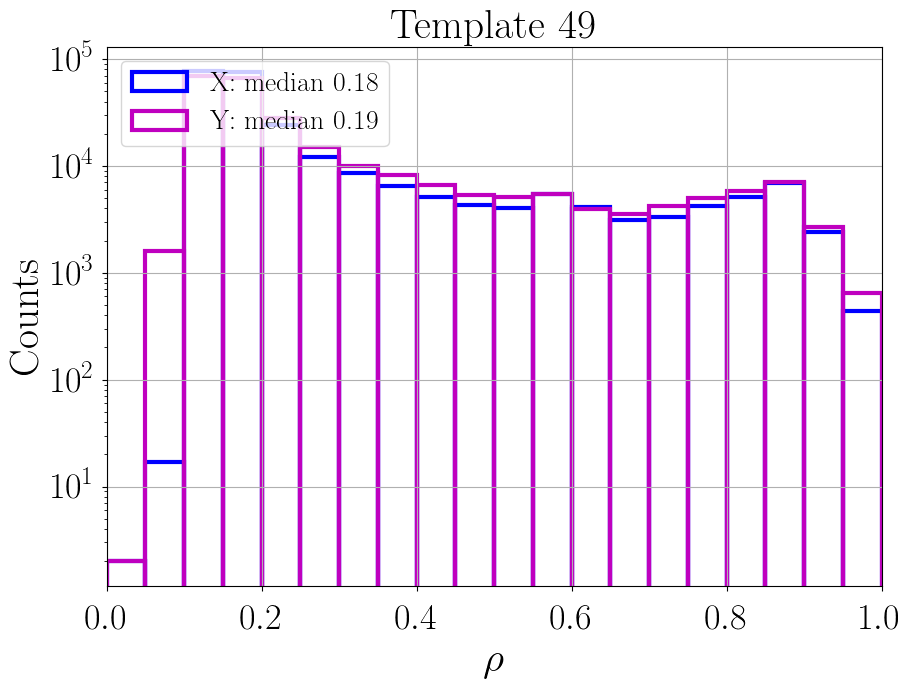

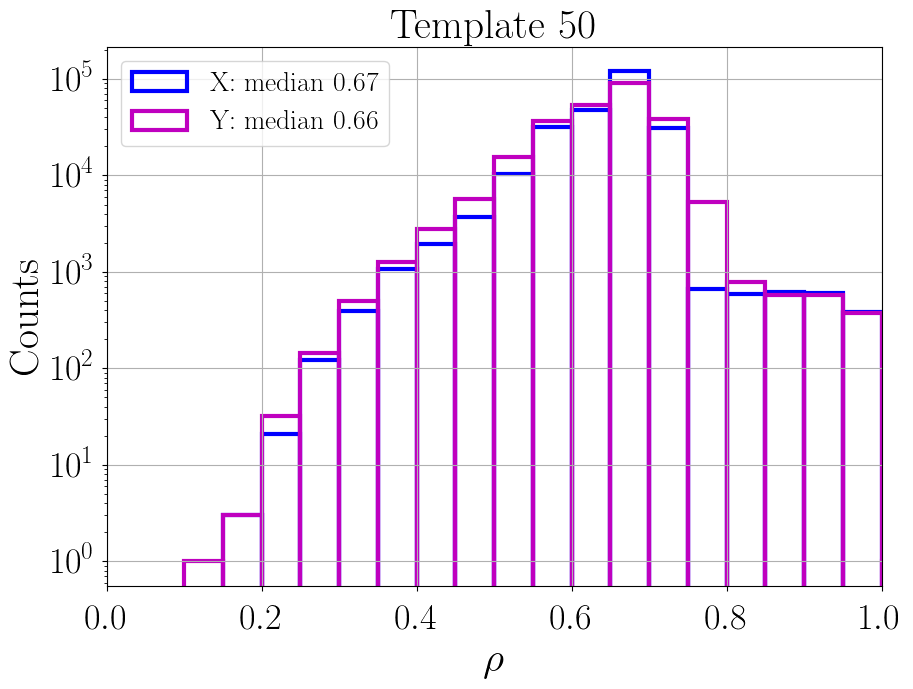

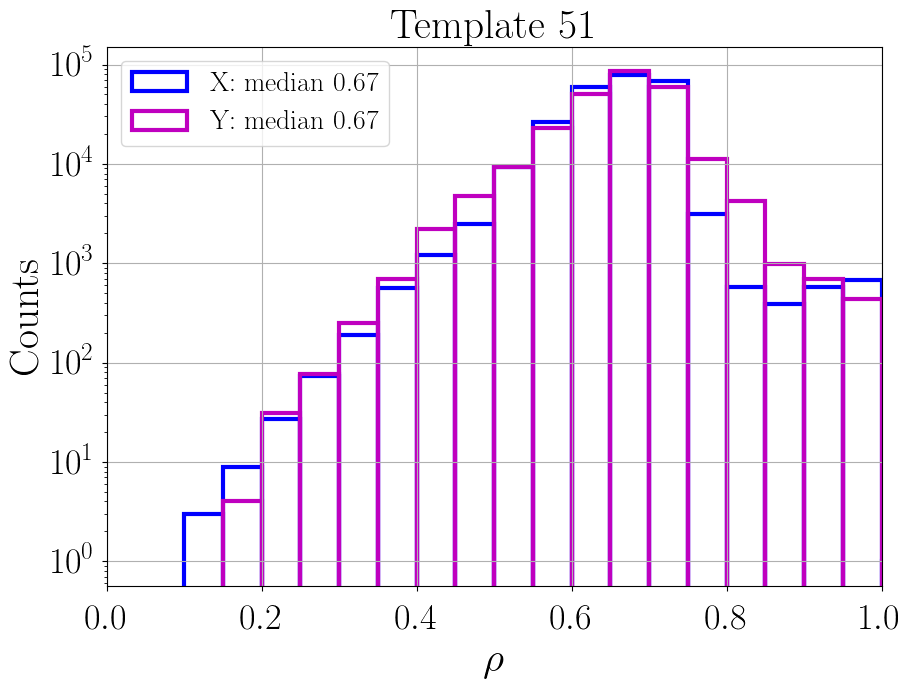

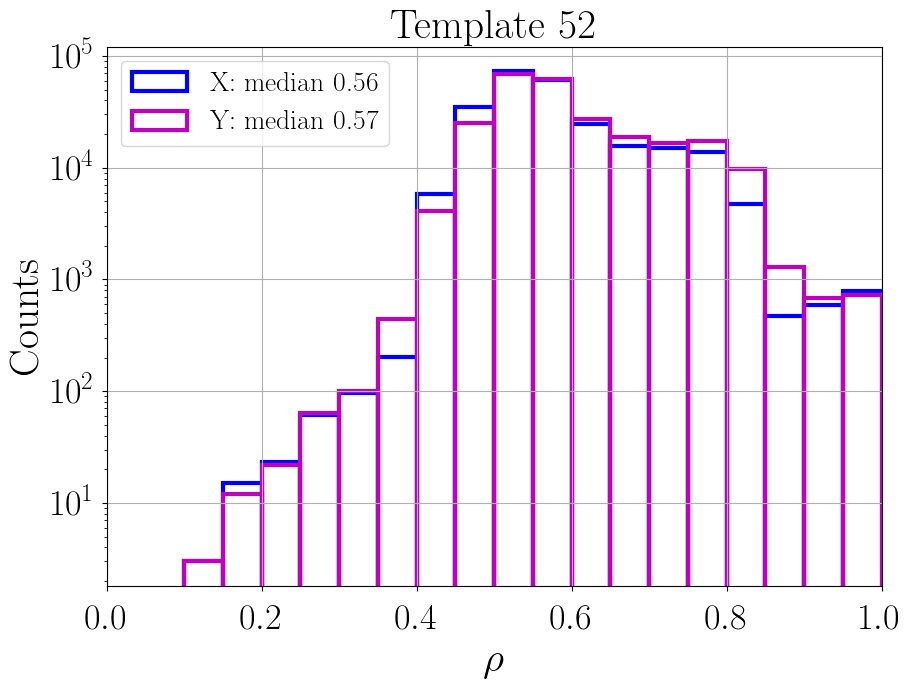

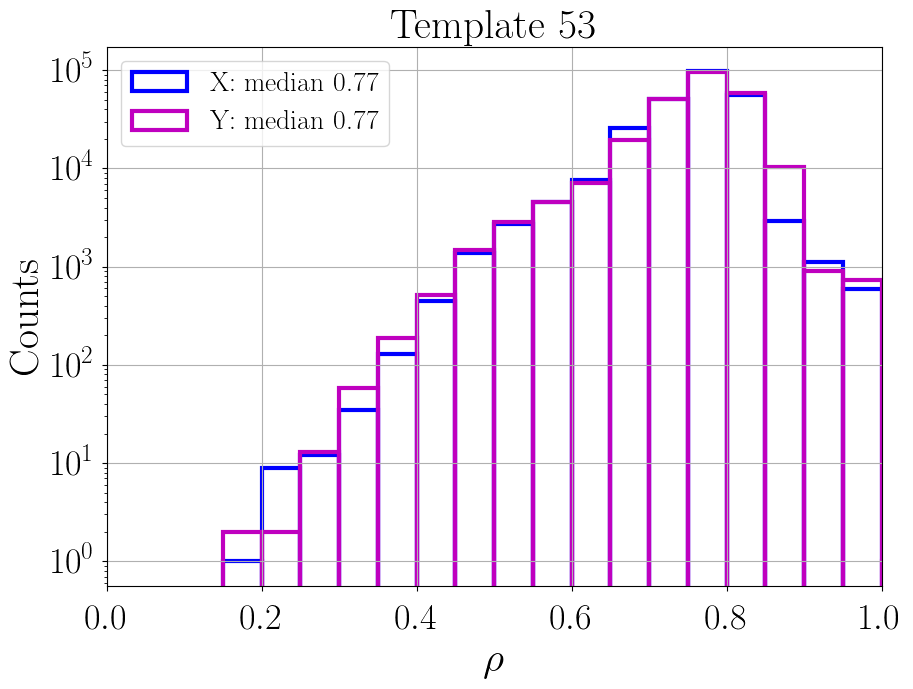

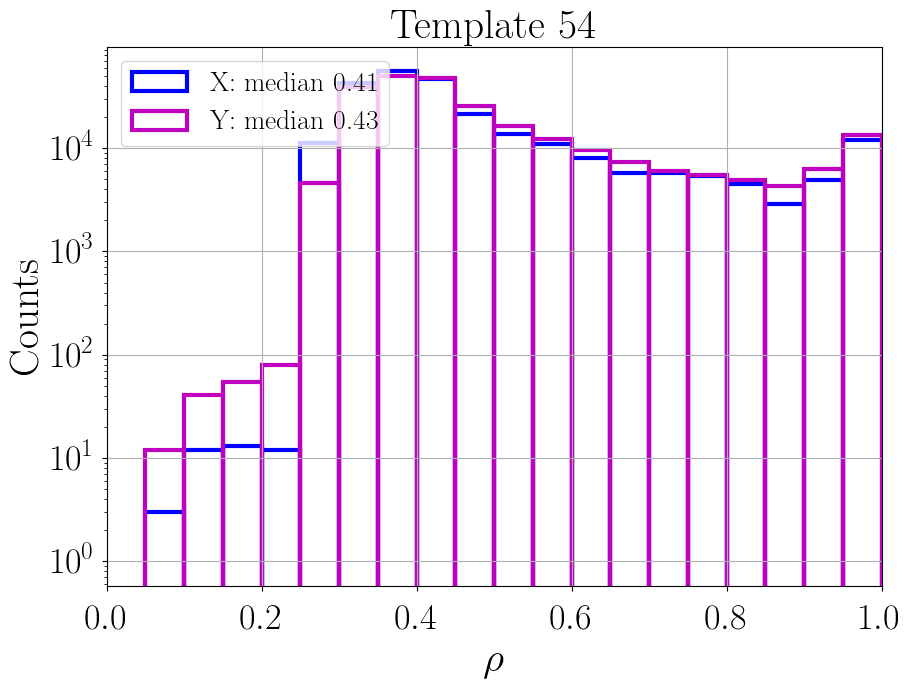

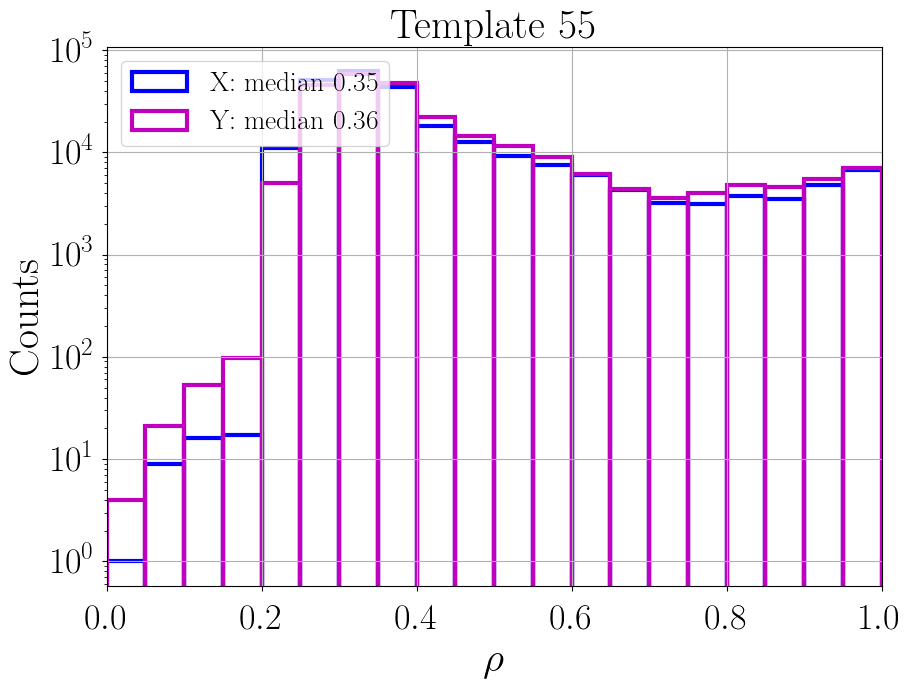

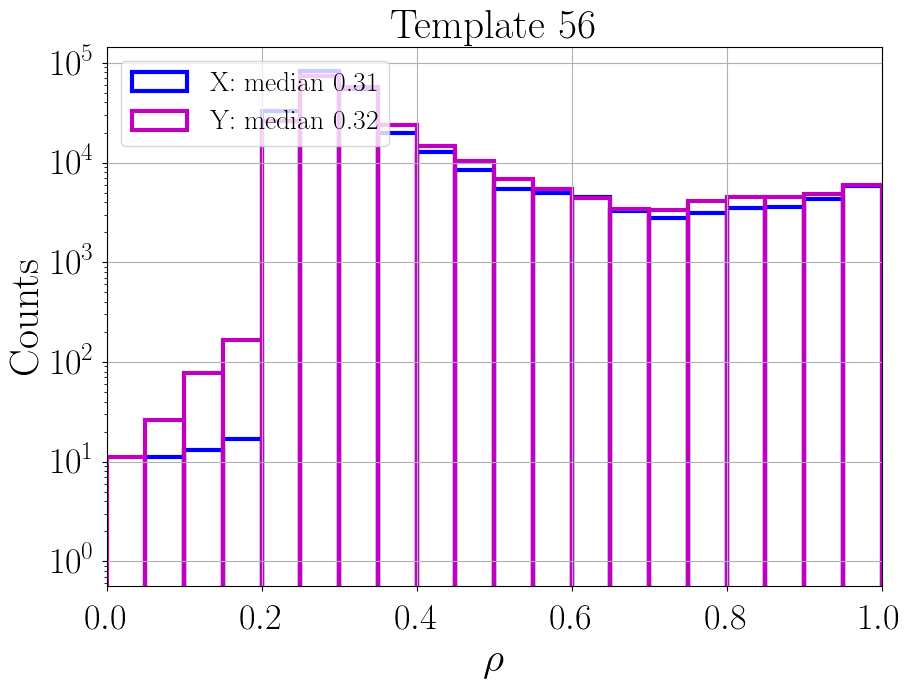

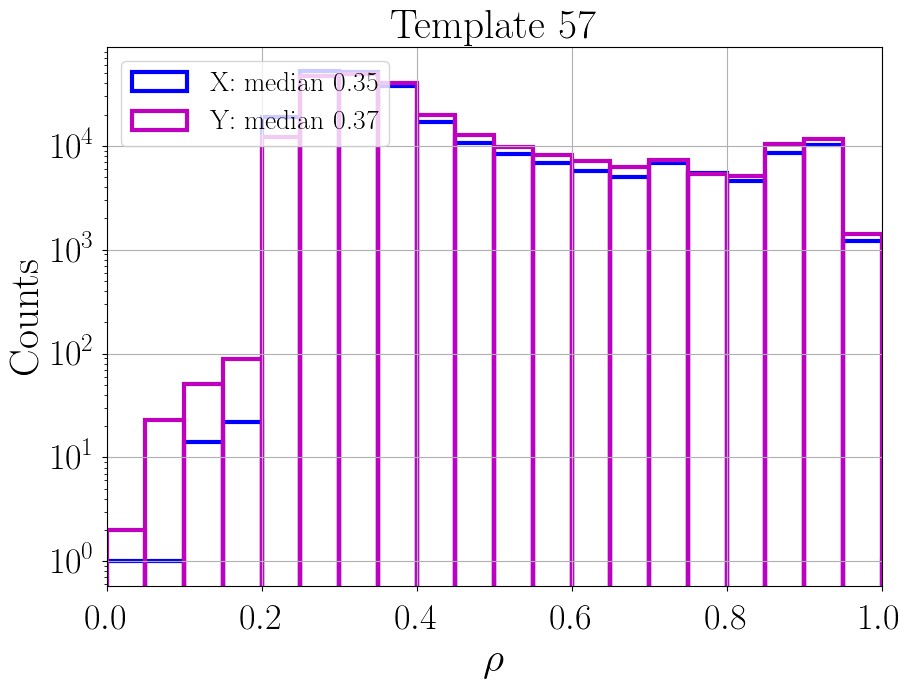

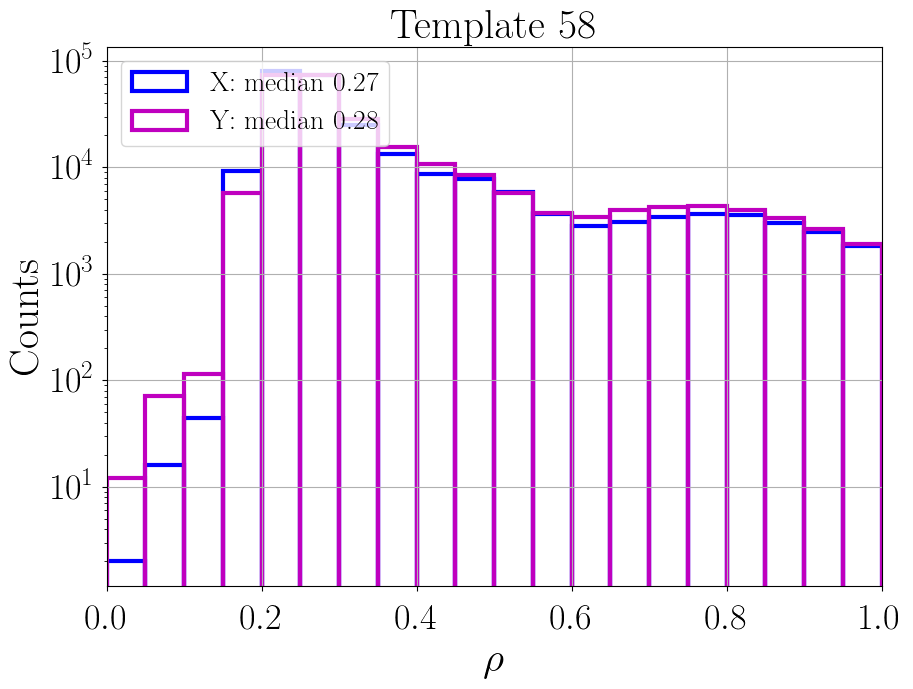

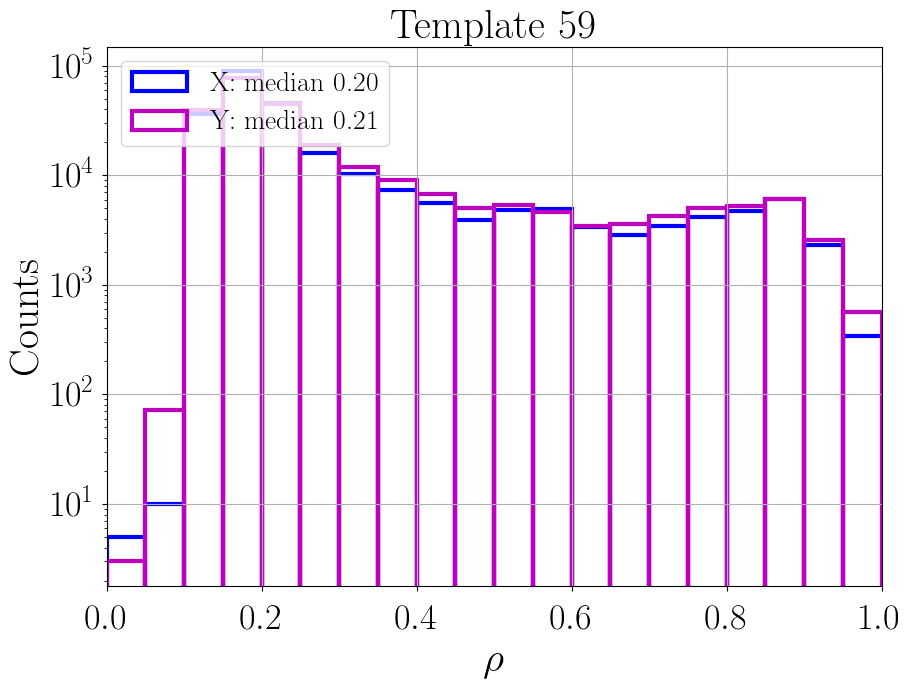

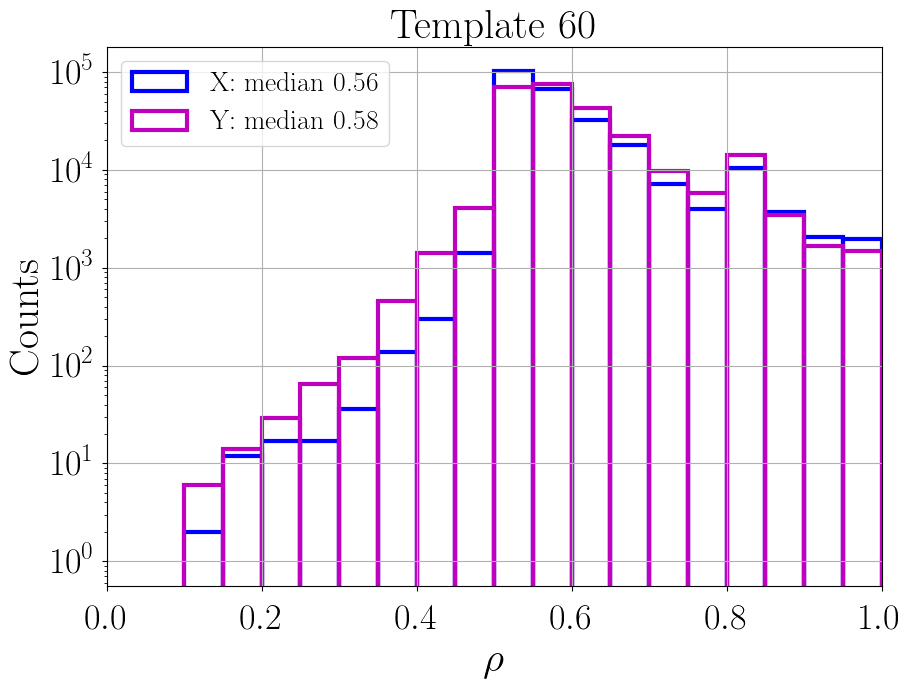

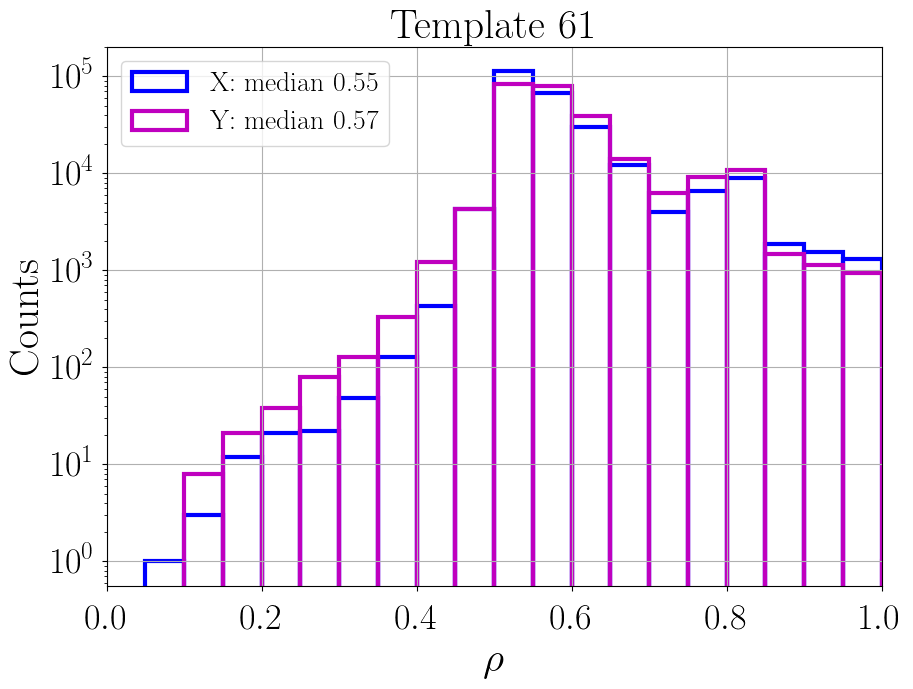

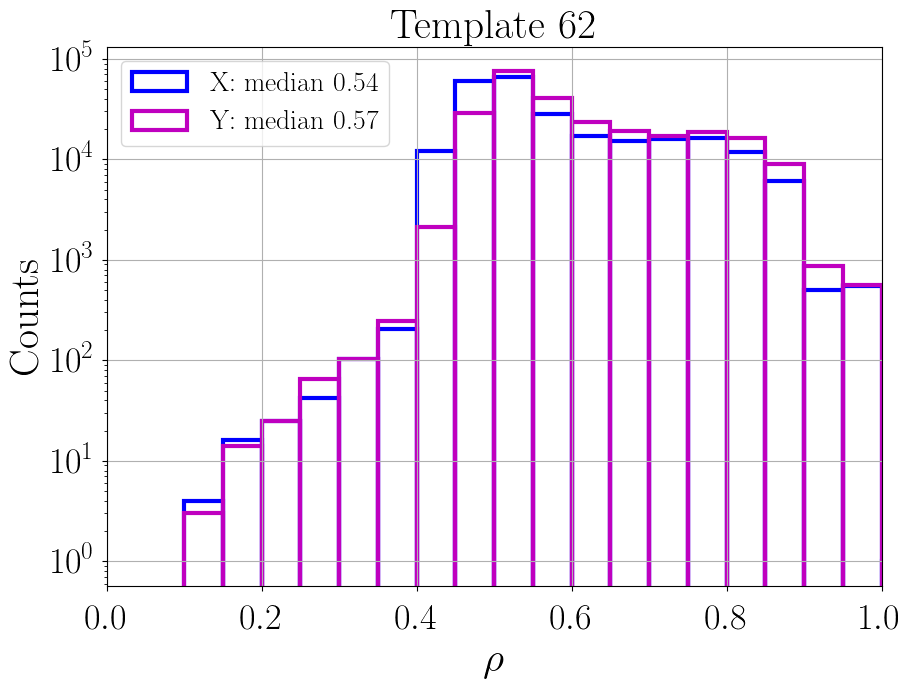

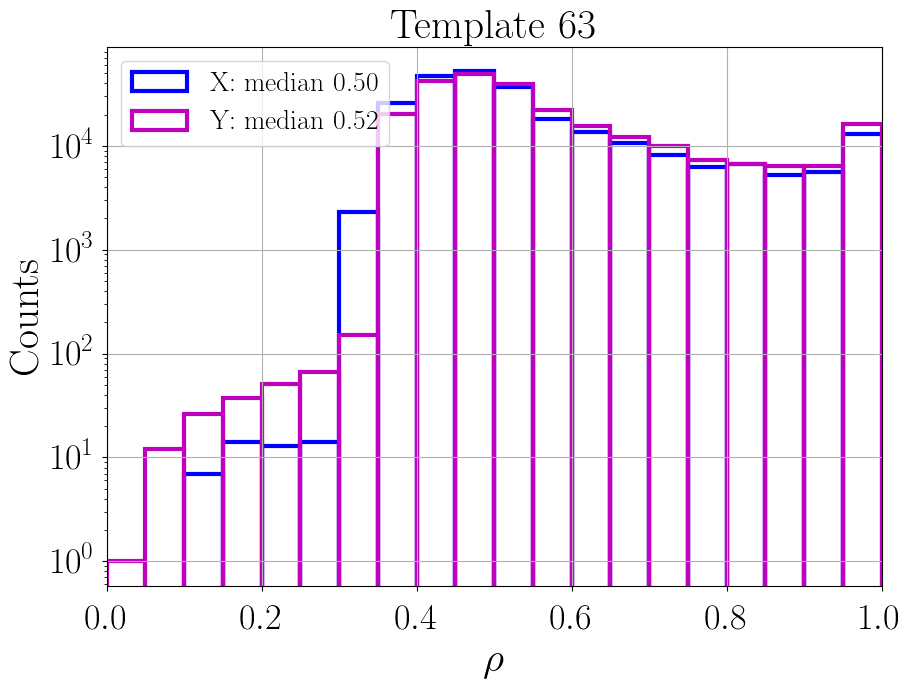

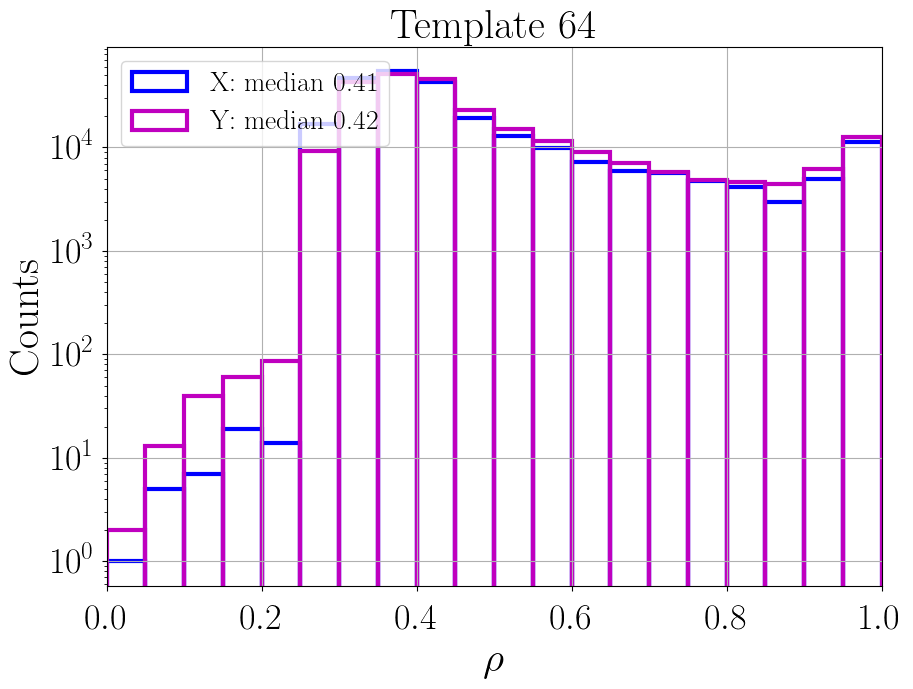

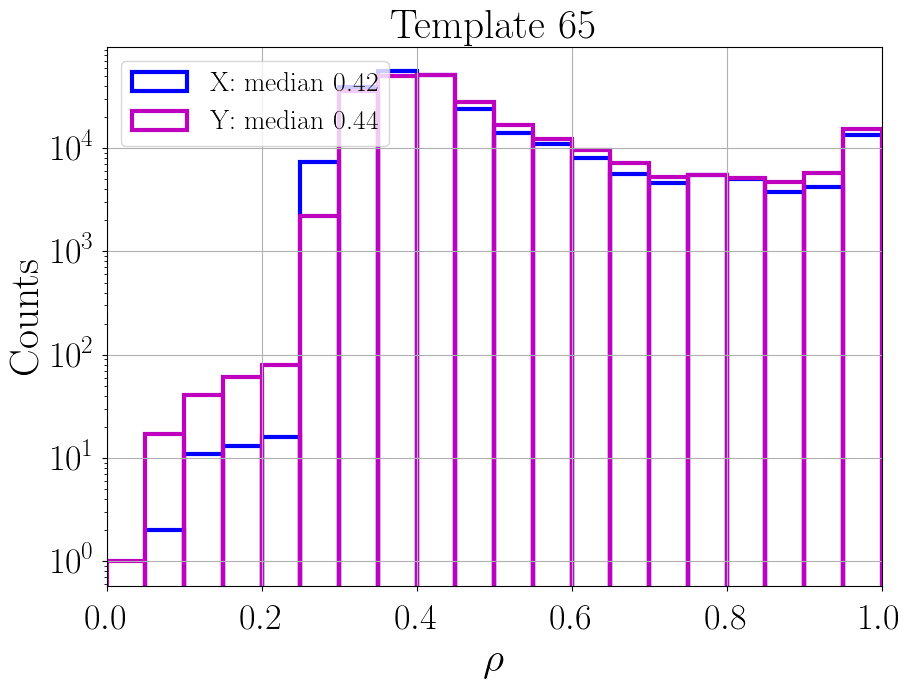

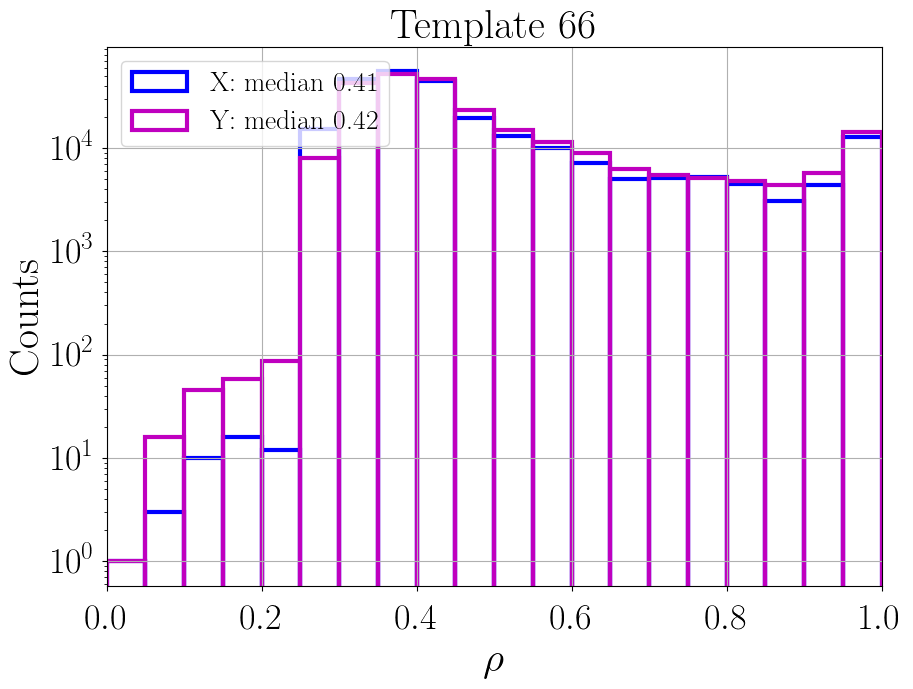

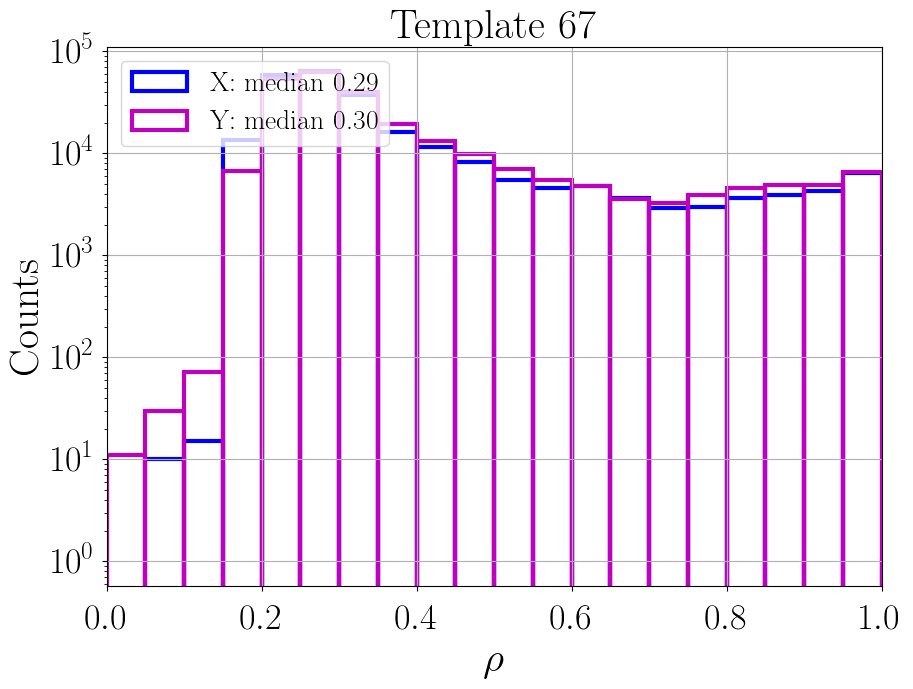

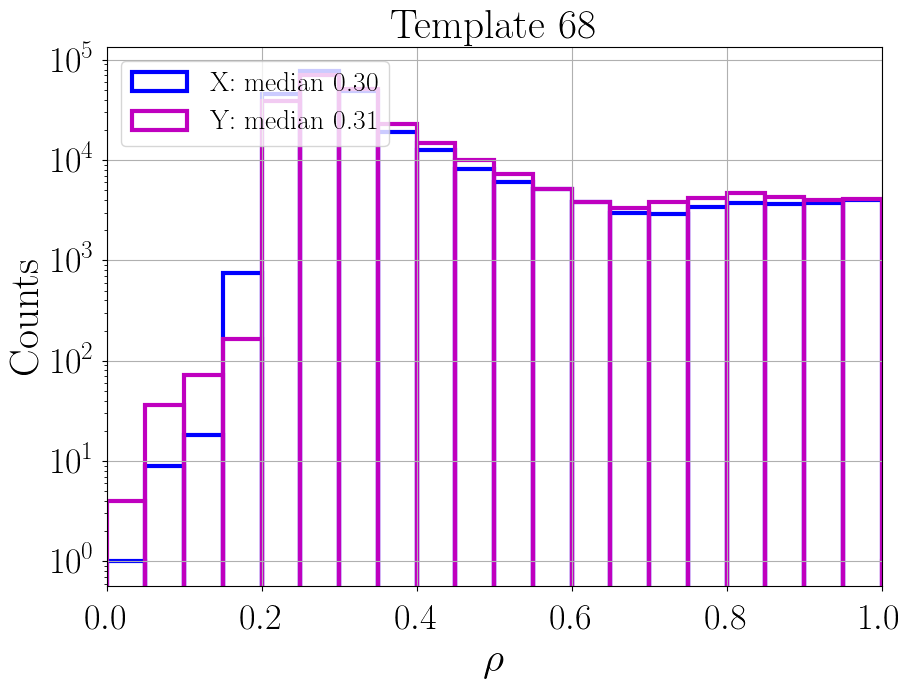

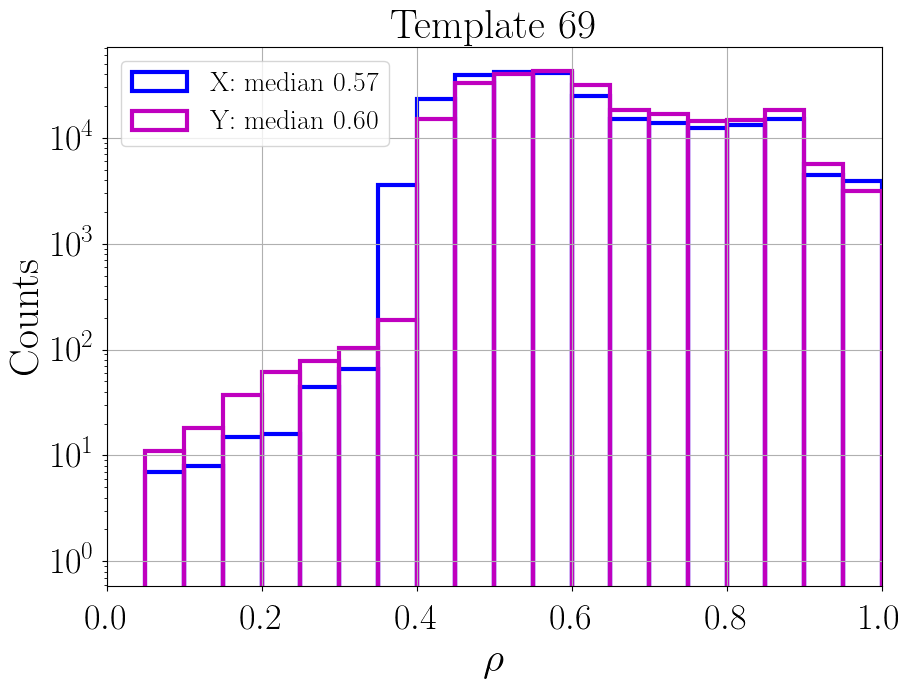

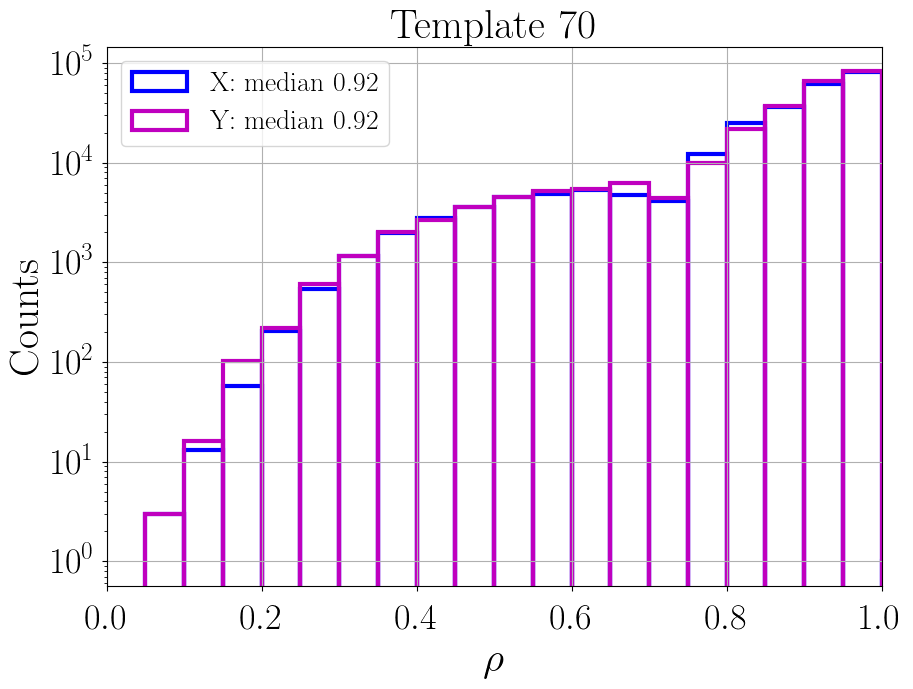

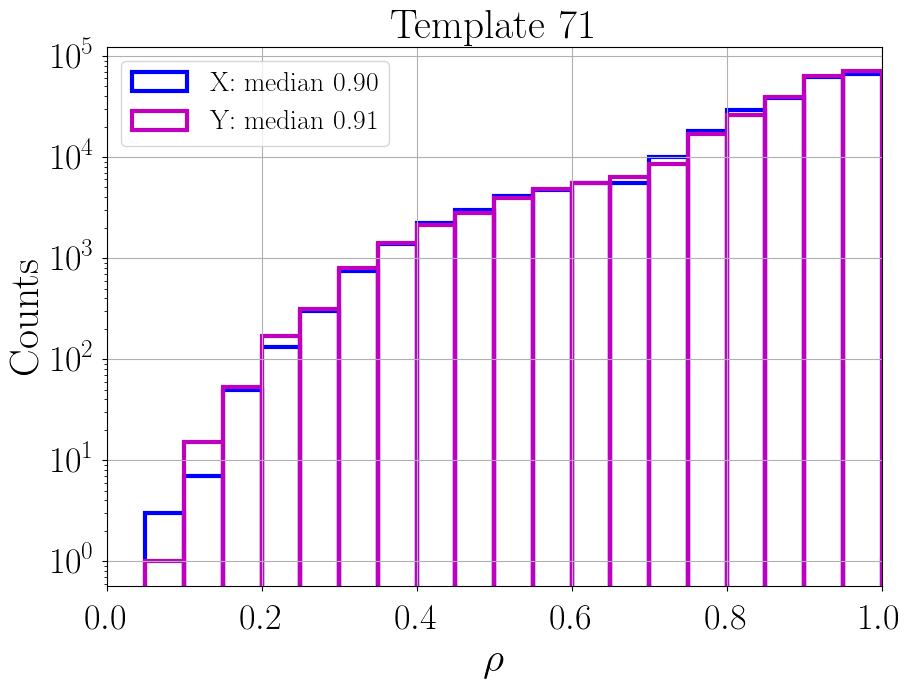

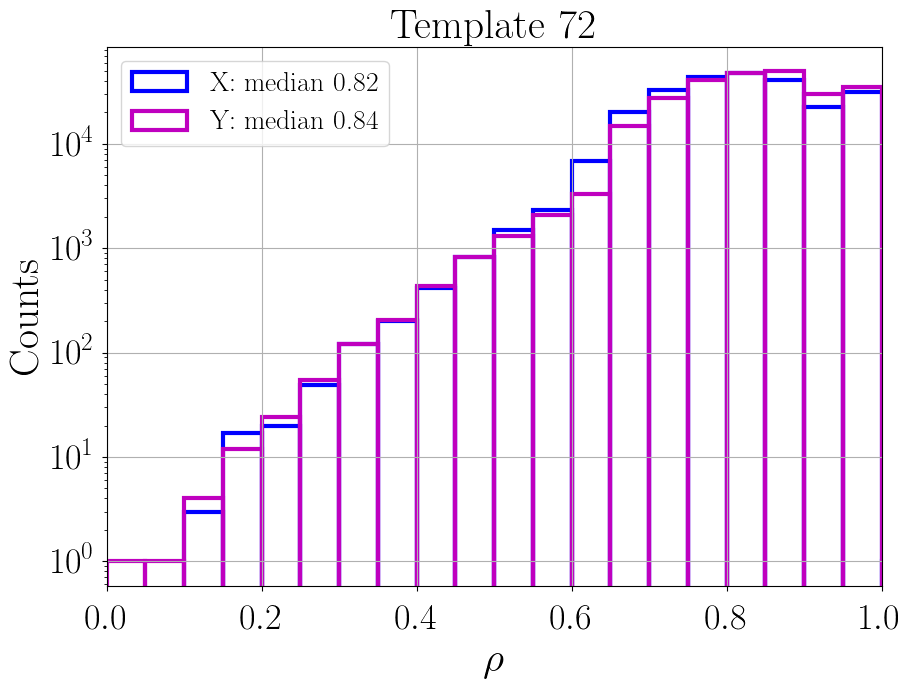

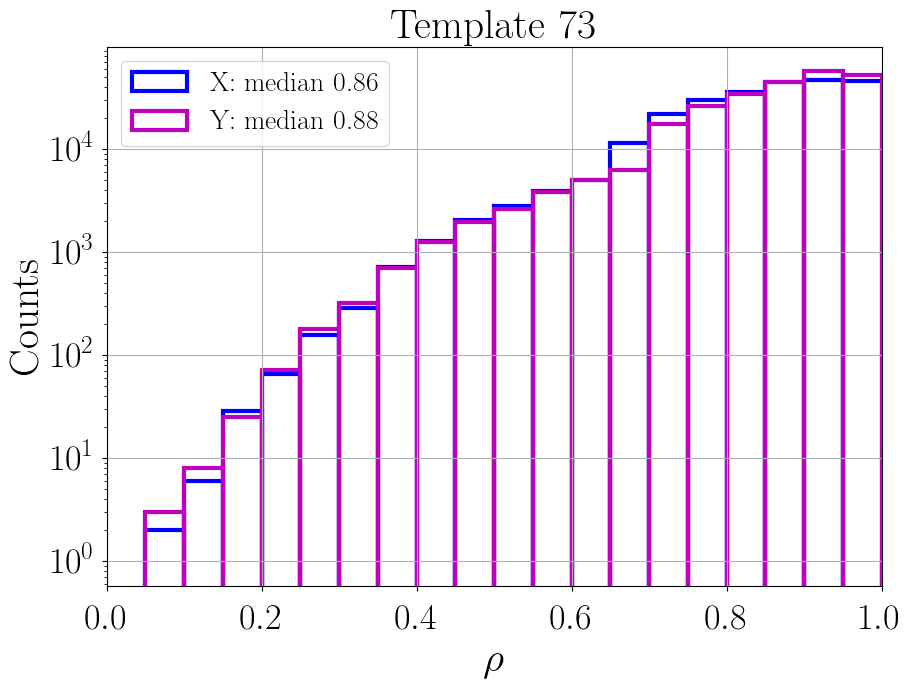

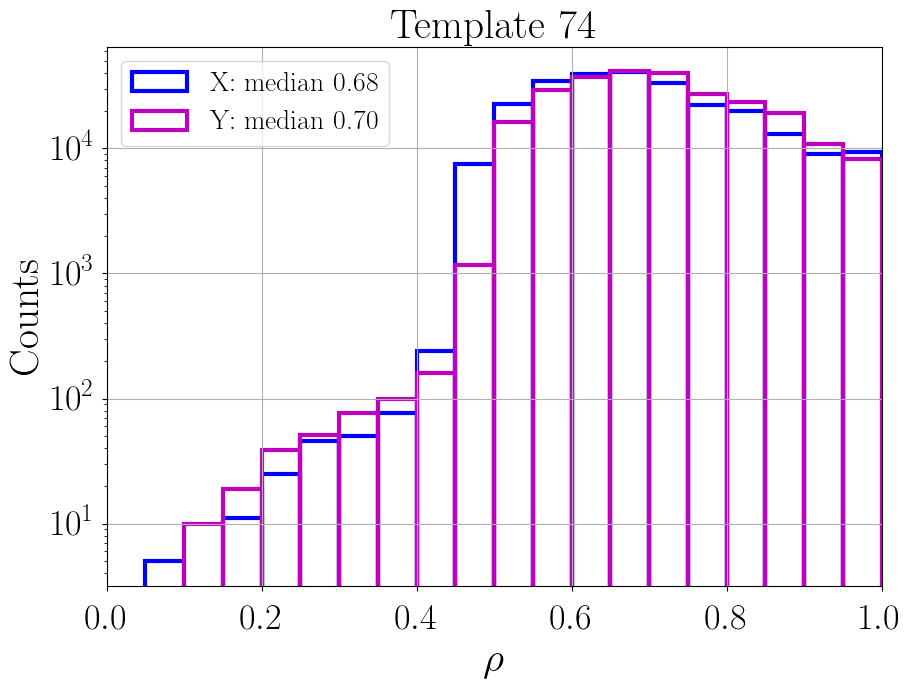

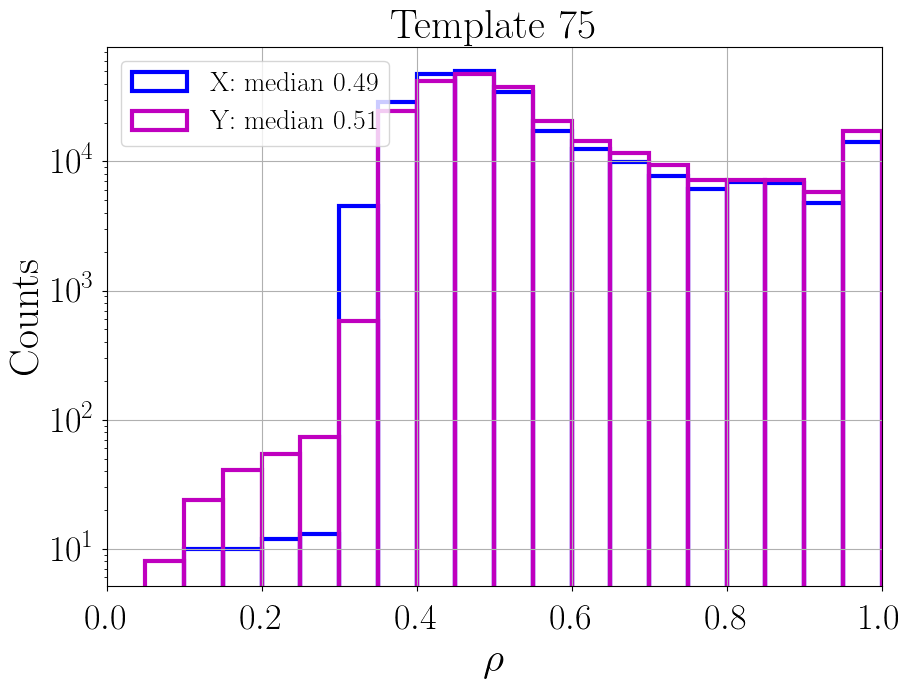

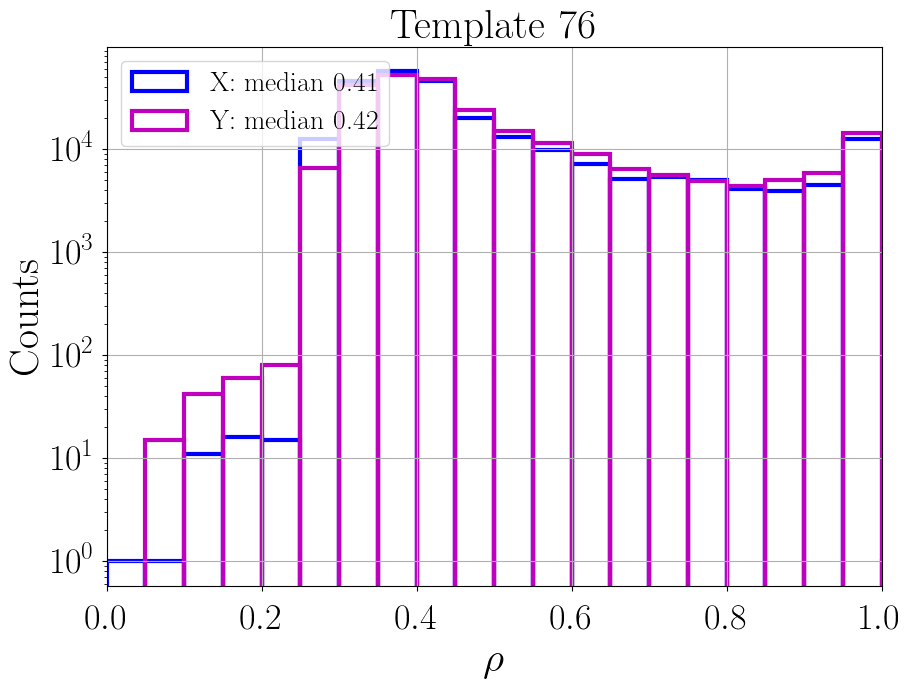

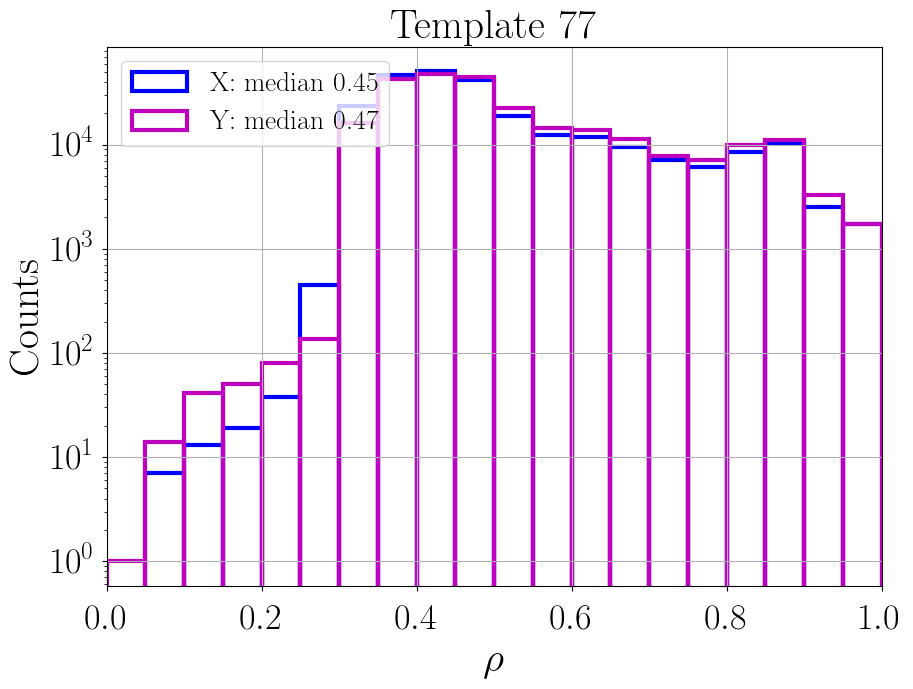

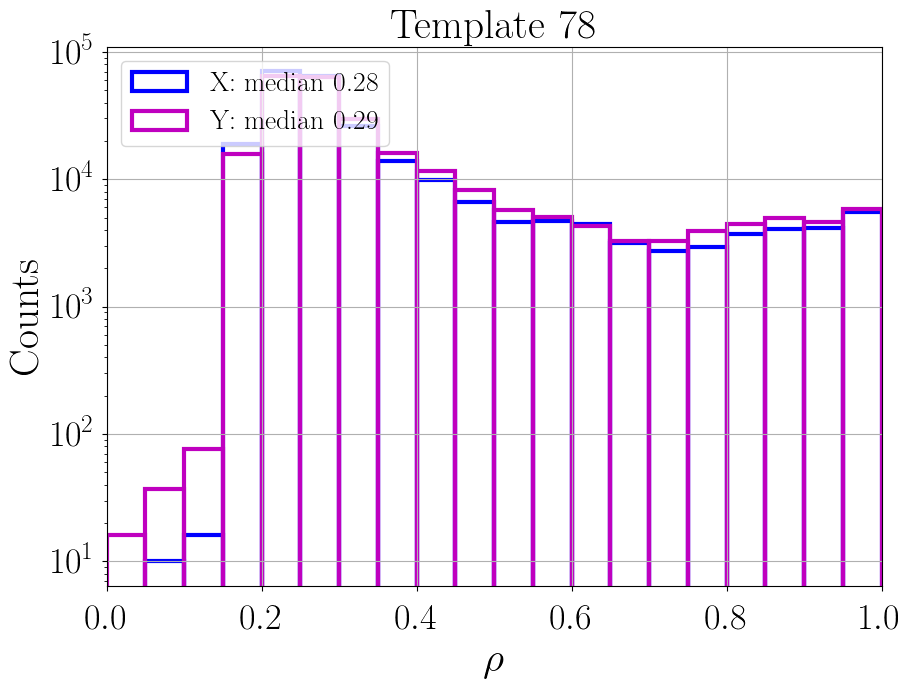

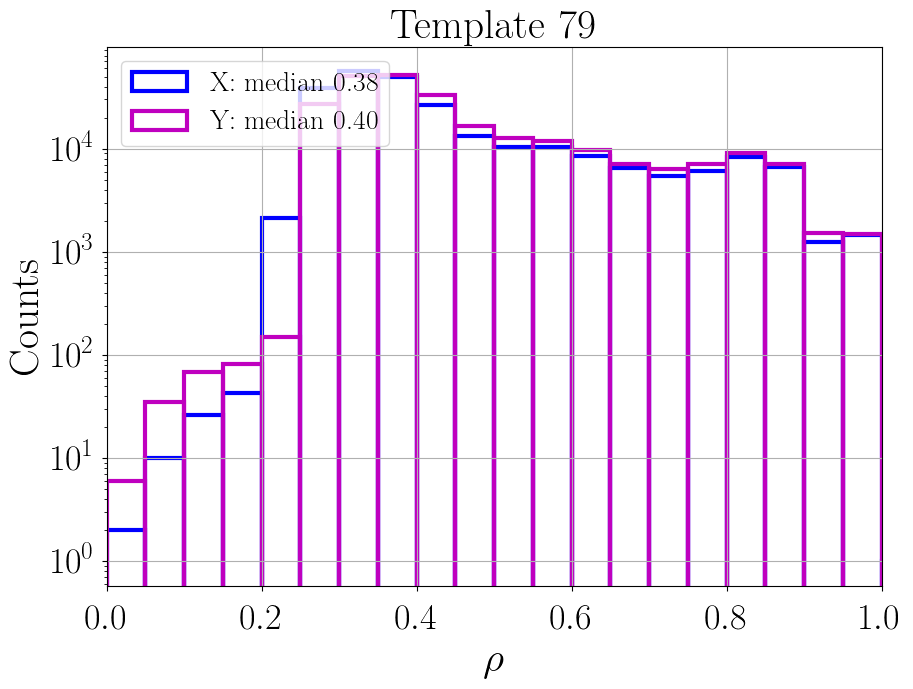

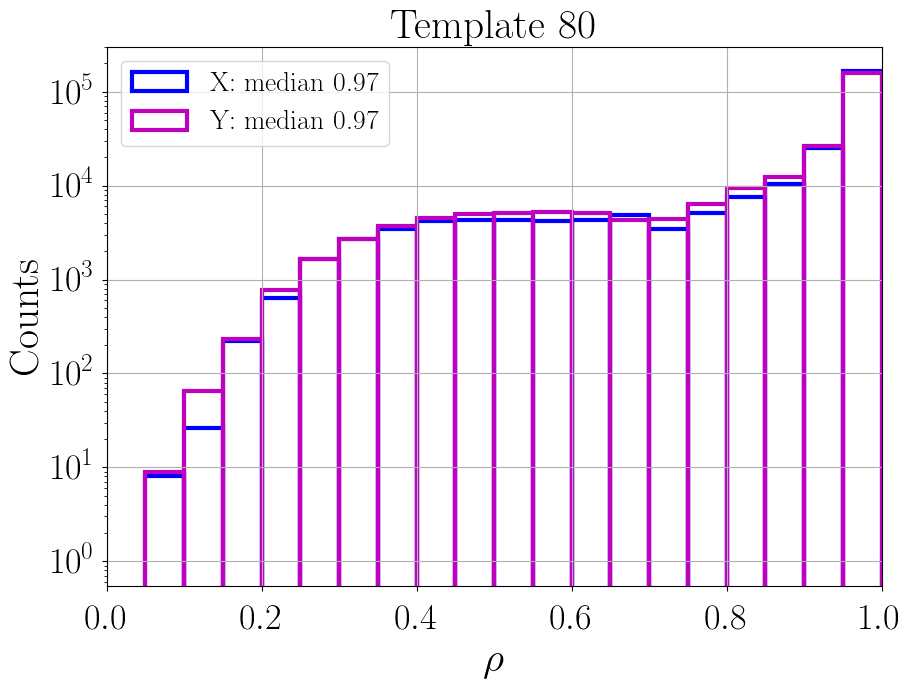

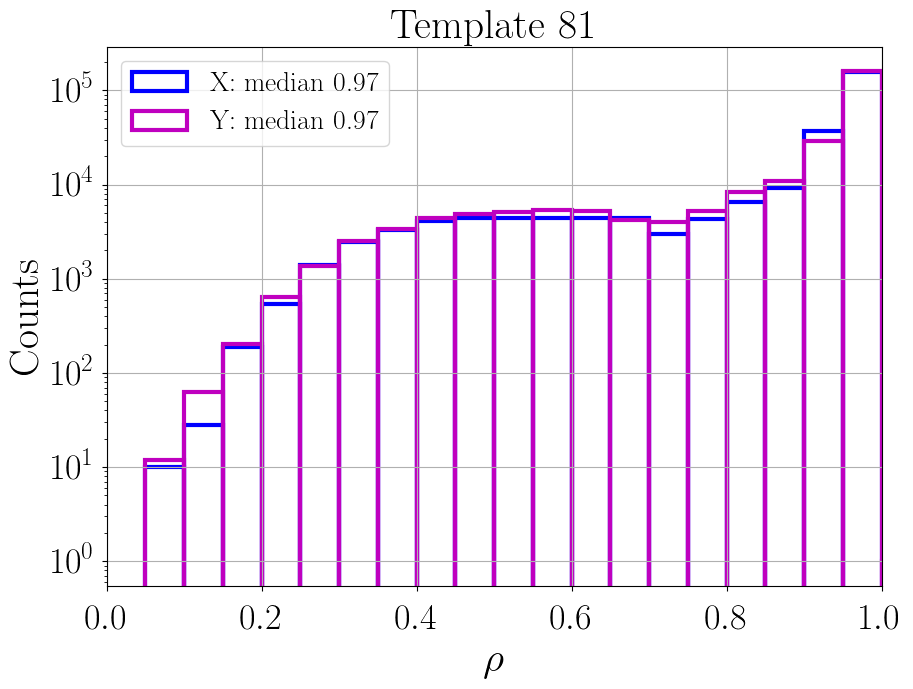

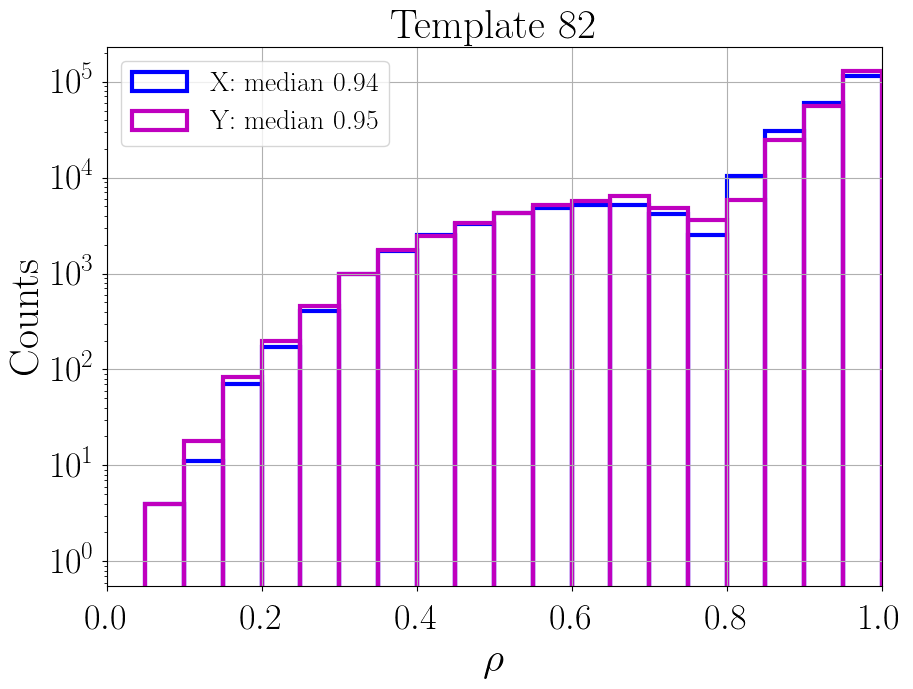

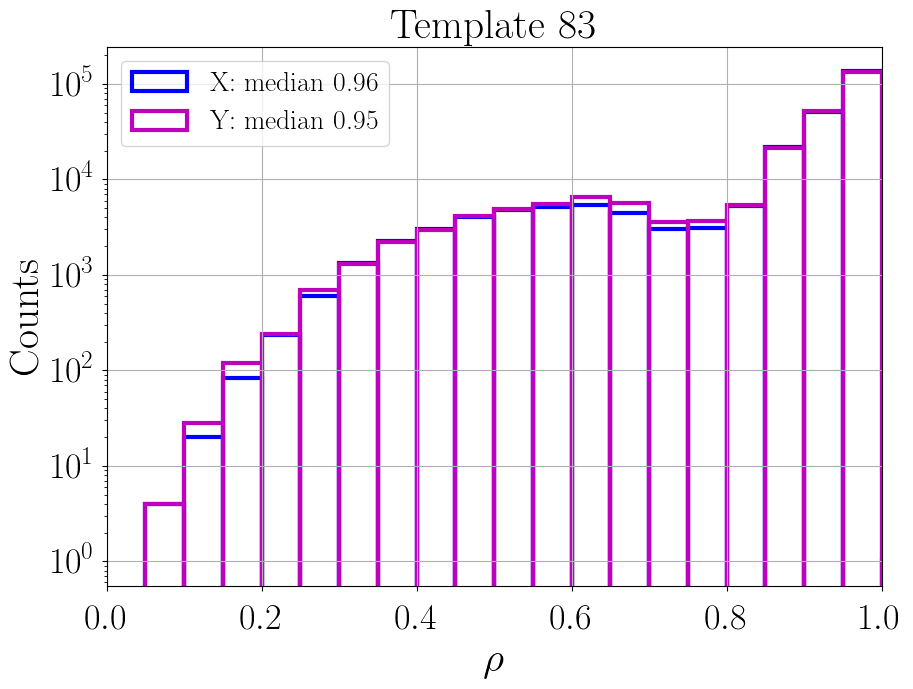

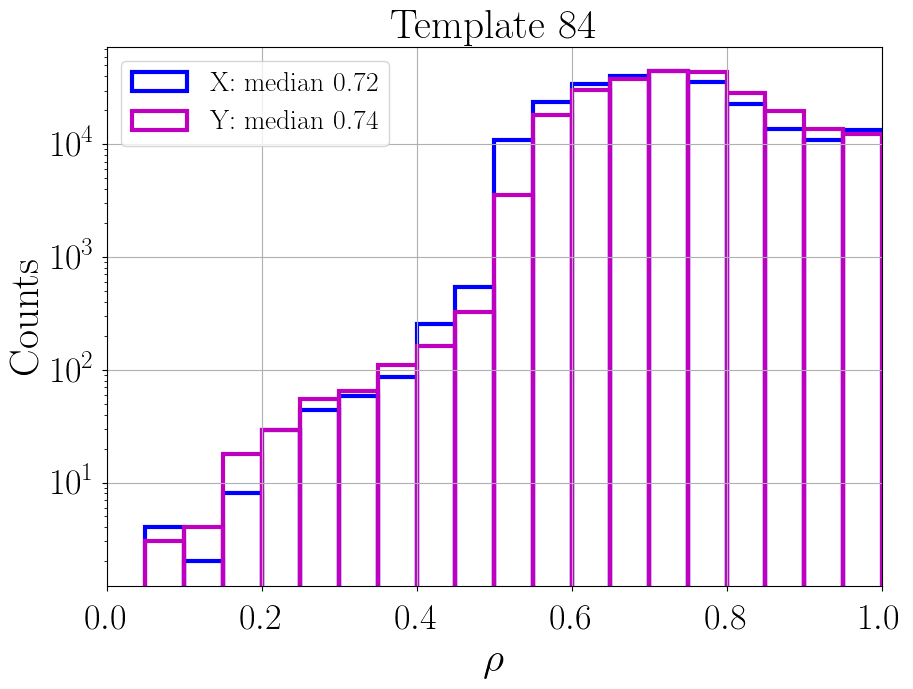

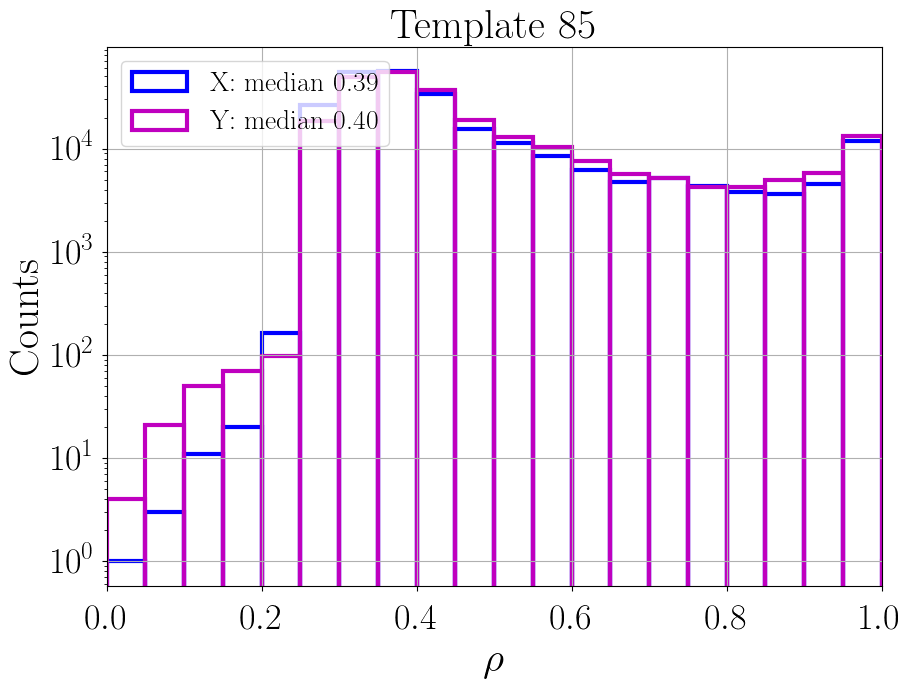

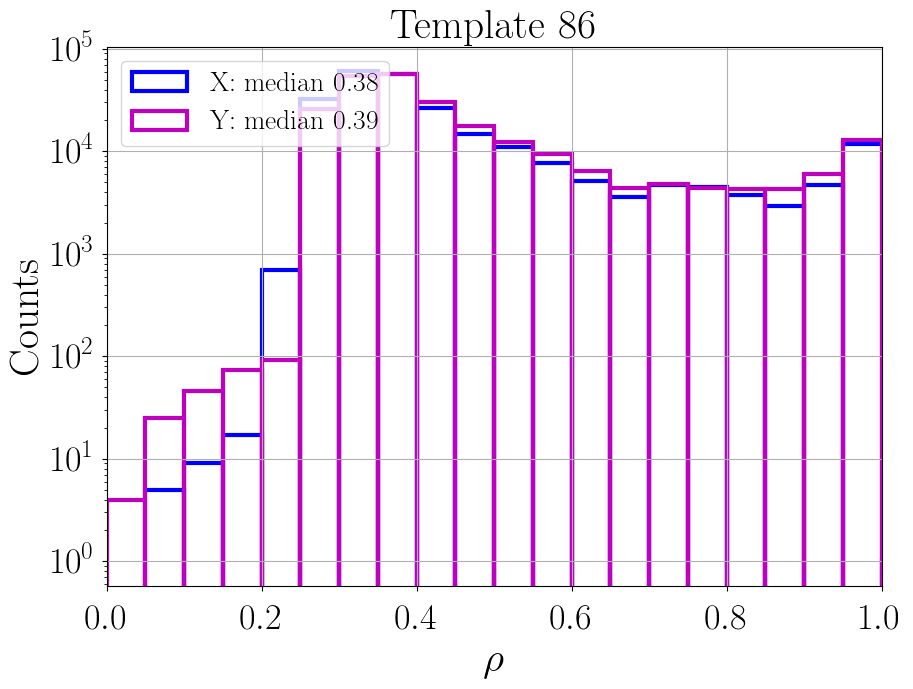

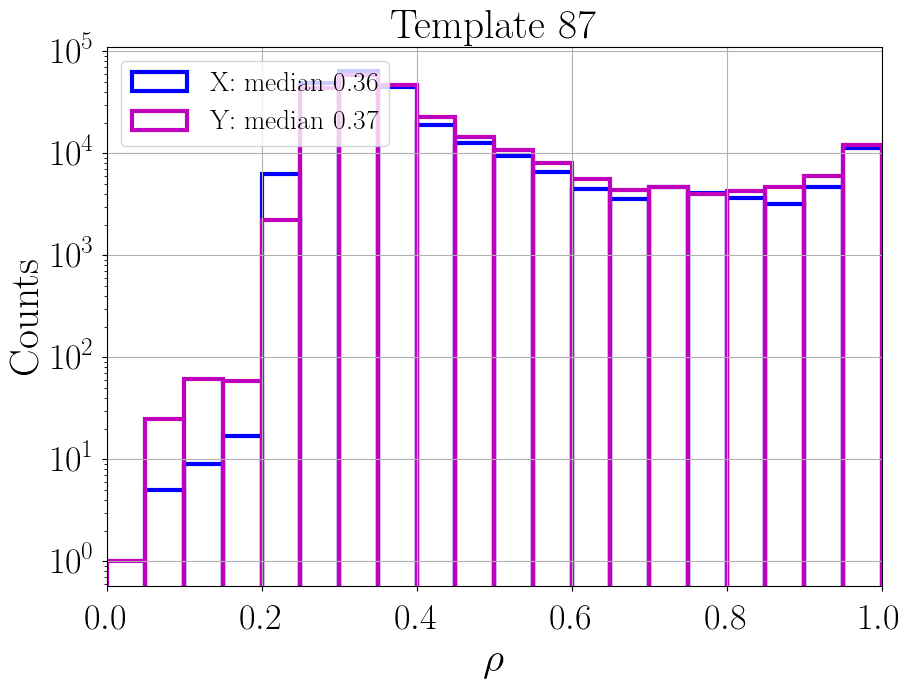

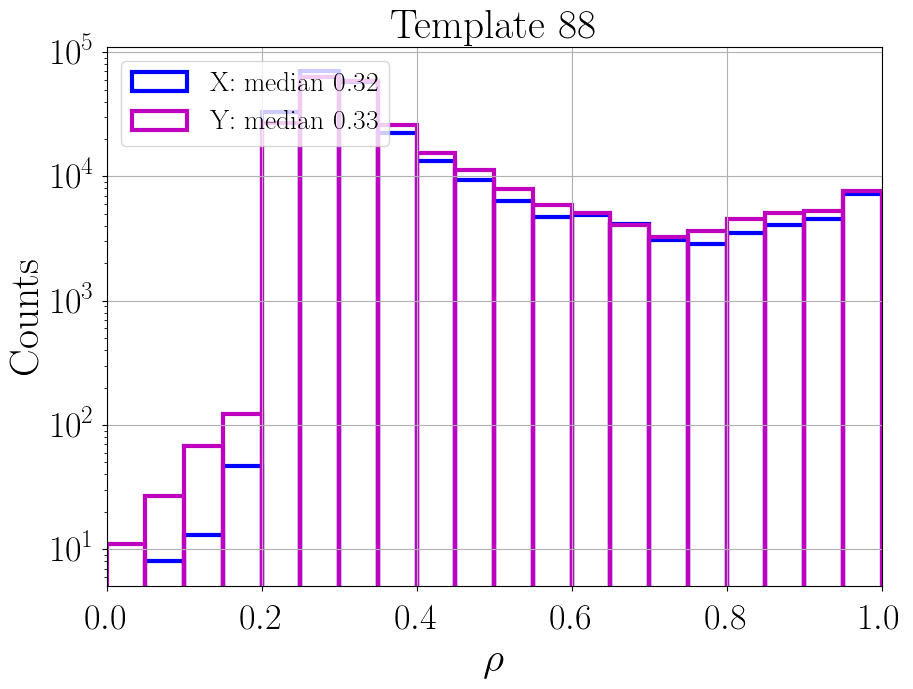

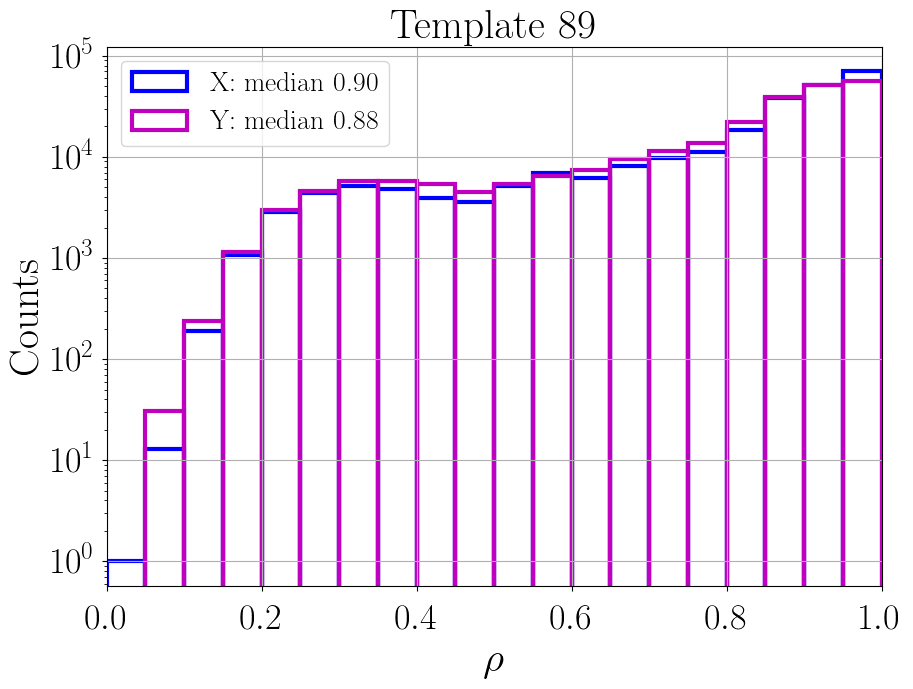

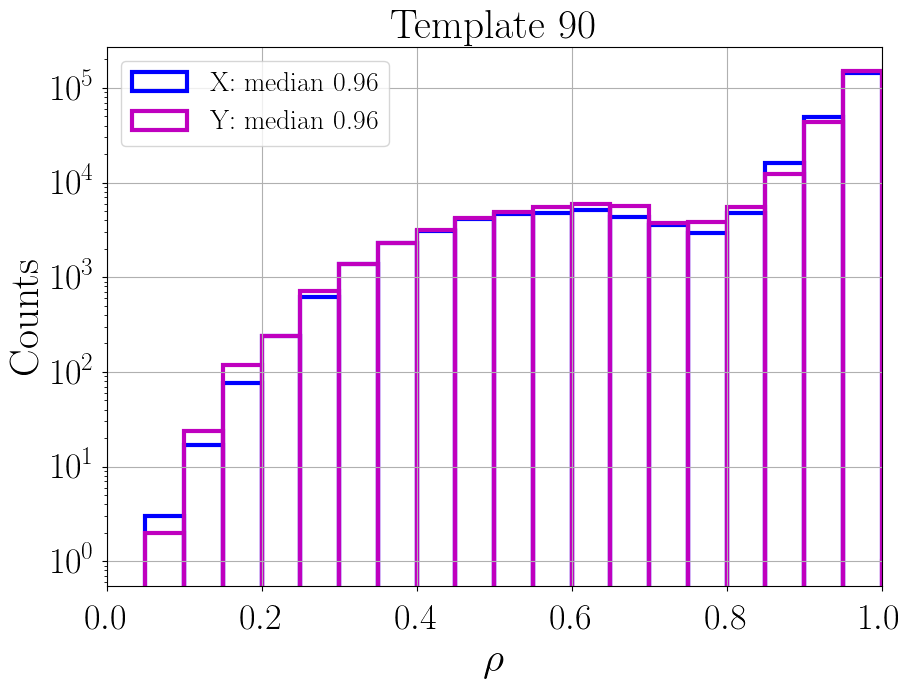

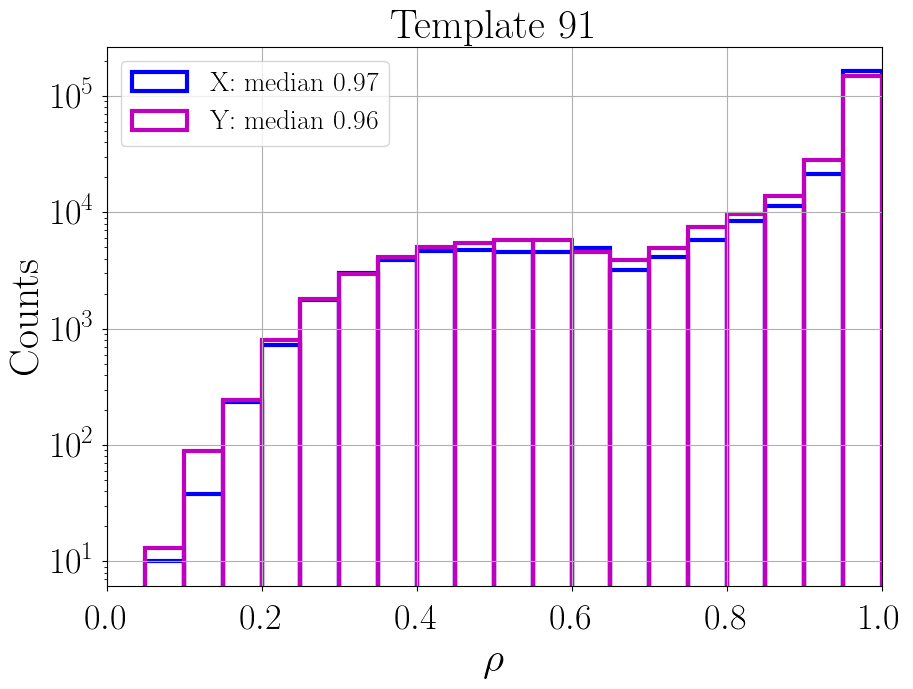

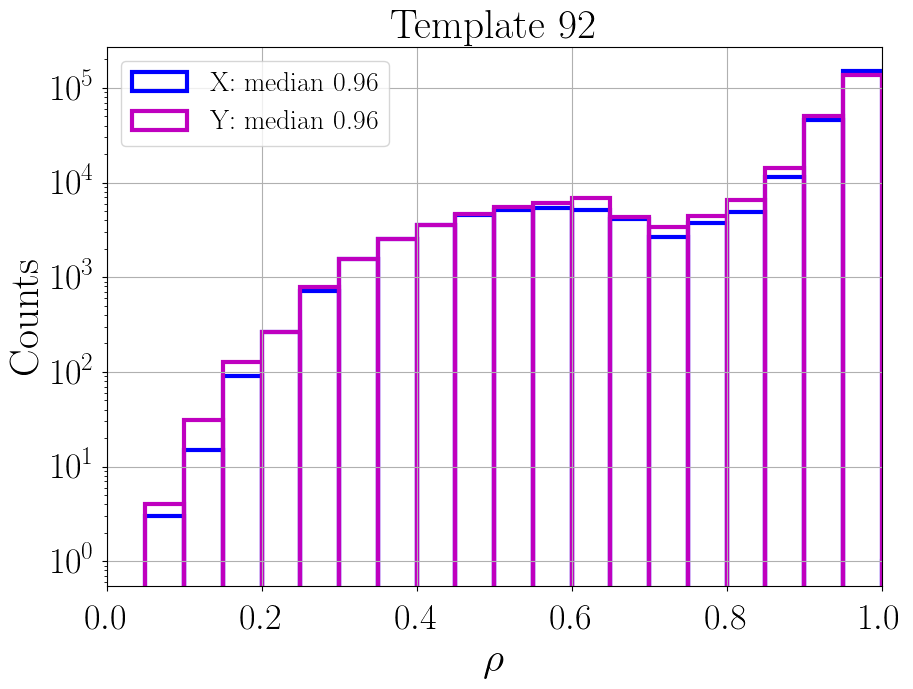

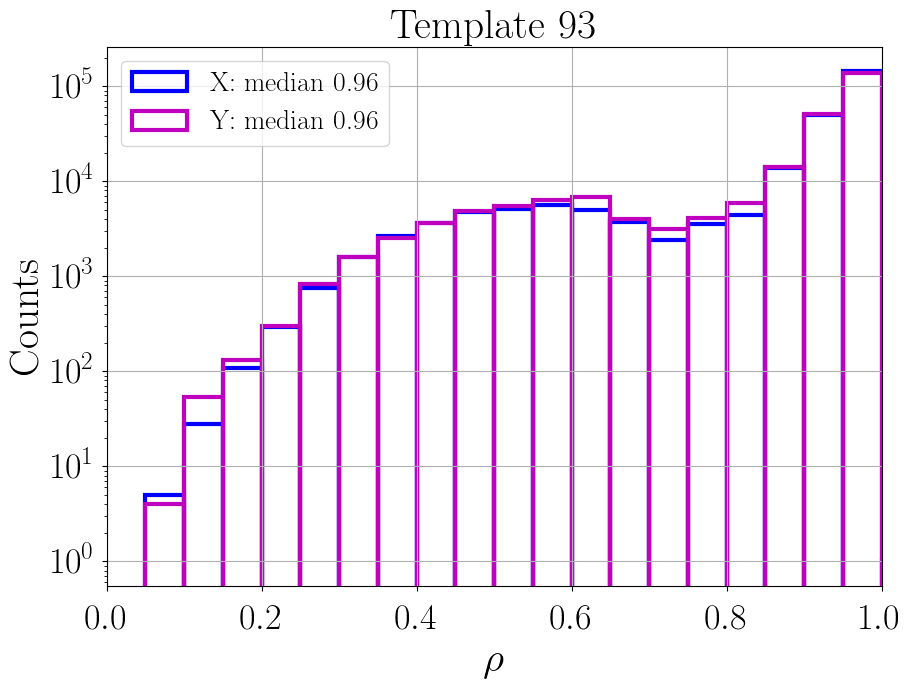

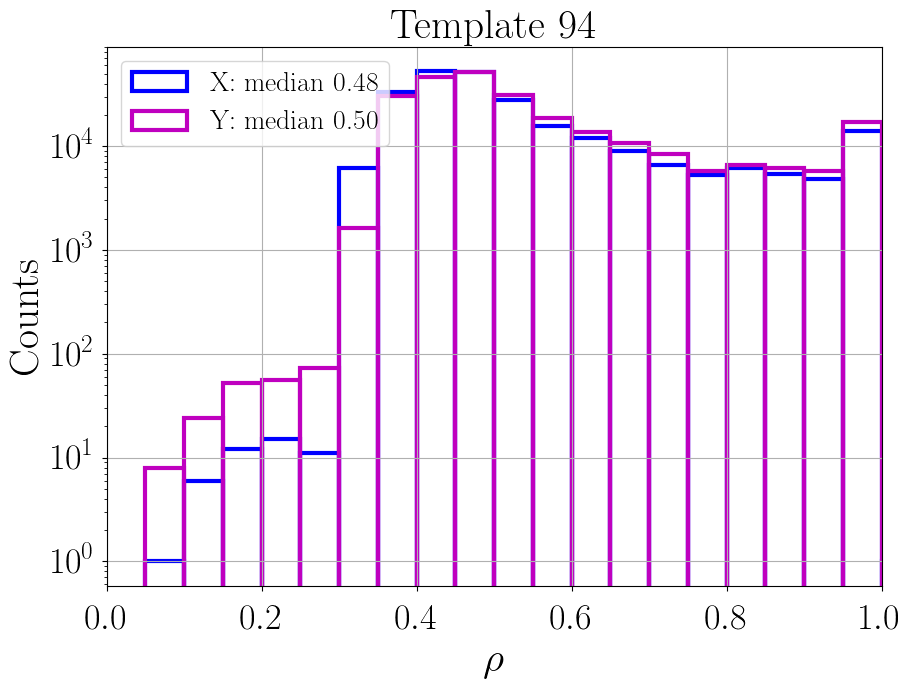

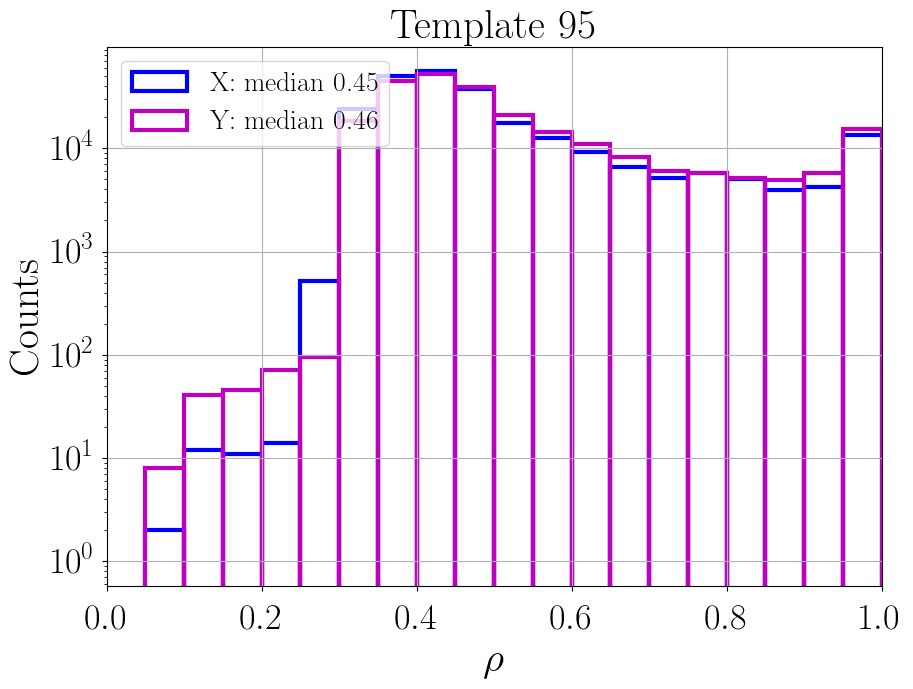

In [6]:
corr_bin_centers = (corr_bin_edges[:-1] + corr_bin_edges[1:])/2
corr_bin_width   = .05

for i in range(n_templates):
    plt.bar(corr_bin_centers,corr_hists_x[:,i],width=corr_bin_width,label=f'X: median {corr_median_x[i]:.2f}',fill=False,edgecolor='b',linewidth=3)
    plt.bar(corr_bin_centers,corr_hists_y[:,i],width=corr_bin_width,label=f'Y: median {corr_median_y[i]:.2f}',fill=False,edgecolor='m',linewidth=3)

    plt.xlim([0,1])
    plt.yscale('log')

    plt.xlabel(r'$\rho$')
    plt.ylabel('Counts')

    title = f'Template {i}'
    plt.title(title)

    plt.legend(fontsize=20,frameon=True,framealpha=.8,loc='upper left')
    plt.show()

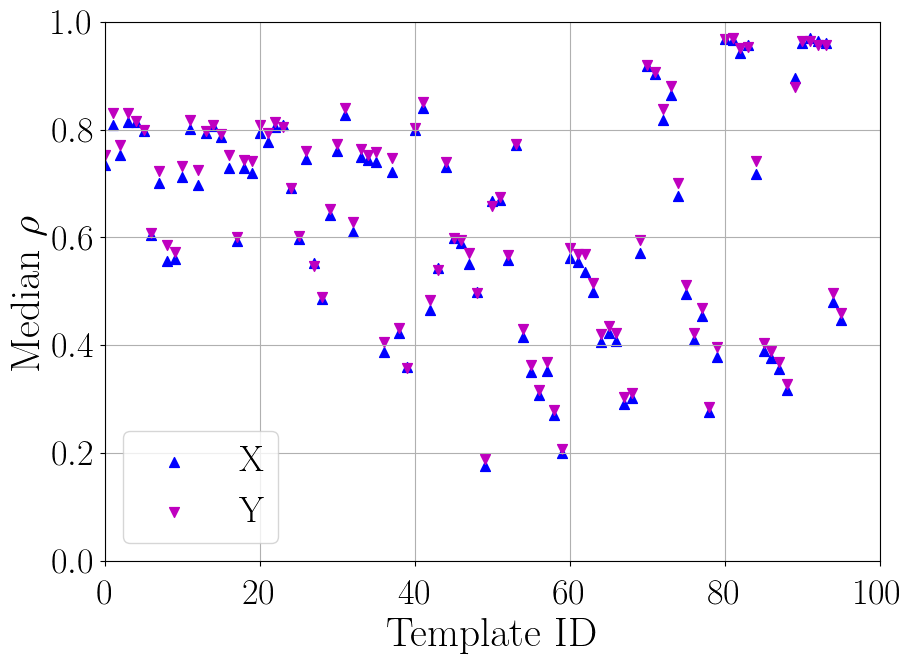

In [7]:
template_ids = np.arange(n_templates)

plt.scatter(template_ids,corr_median_x,marker='^',s=50,color='b',label='X')
plt.scatter(template_ids,corr_median_y,marker='v',s=50,color='m',label='Y')

plt.xlim([0,100])
plt.ylim([0,1])

plt.xlabel('Template ID')
plt.ylabel(r'Median $\rho$')

plt.legend(frameon=True,framealpha=.8)

plt.show()

In [15]:
idcs_sorted = np.argsort(corr_median_x)[::-1]

for idx in idcs_sorted:
    print(f'Template {i}: median correlation {corr_median_x[i]}')

array([0.96917717, 0.96838931, 0.96635842, 0.96484373, 0.96093867,
       0.96075292, 0.95666202, 0.94304234, 0.91839082, 0.90249001,
       0.89581152, 0.86343954, 0.84011823, 0.82625946, 0.81833026,
       0.81419923, 0.81402313, 0.80870187, 0.80832218, 0.80623581,
       0.80496798, 0.80041081, 0.79891306, 0.79790861, 0.79360204,
       0.79329643, 0.78629718, 0.77788658, 0.77133232, 0.76081143,
       0.75370151, 0.74846101, 0.74541119, 0.74276777, 0.7407182 ,
       0.73437733, 0.73116992, 0.72949789, 0.72789869, 0.72190452,
       0.71907976, 0.71789516, 0.7127307 , 0.70146452, 0.6979417 ,
       0.69171129, 0.67721191, 0.66877197, 0.6682932 , 0.64230925,
       0.60927273, 0.60444209, 0.59871895, 0.59661231, 0.59381007,
       0.58954459, 0.57163508, 0.56158672, 0.55976473, 0.55794309,
       0.55700556, 0.5536616 , 0.55237387, 0.54980183, 0.54273355,
       0.53602121, 0.49869615, 0.49827159, 0.49476622, 0.4863981 ,
       0.48080685, 0.46465651, 0.45476756, 0.44611755, 0.42179

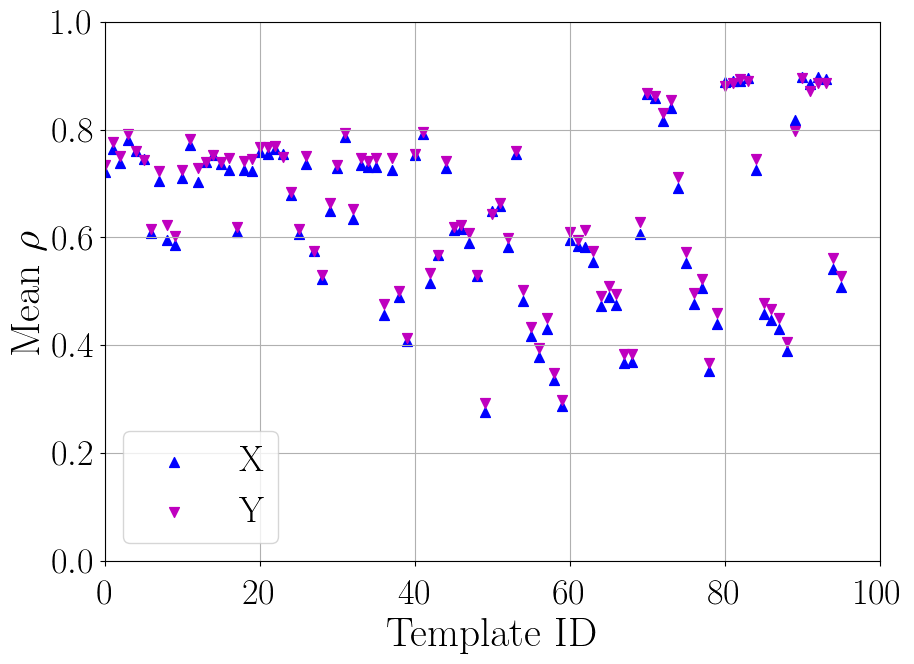

In [12]:
template_ids = np.arange(n_templates)

plt.scatter(template_ids,corr_mean_x,marker='^',s=50,color='b',label='X')
plt.scatter(template_ids,corr_mean_y,marker='v',s=50,color='m',label='Y')

plt.xlim([0,100])
plt.ylim([0,1])

plt.xlabel('Template ID')
plt.ylabel(r'Mean $\rho$')

plt.legend(frameon=True,framealpha=.8)

plt.show()

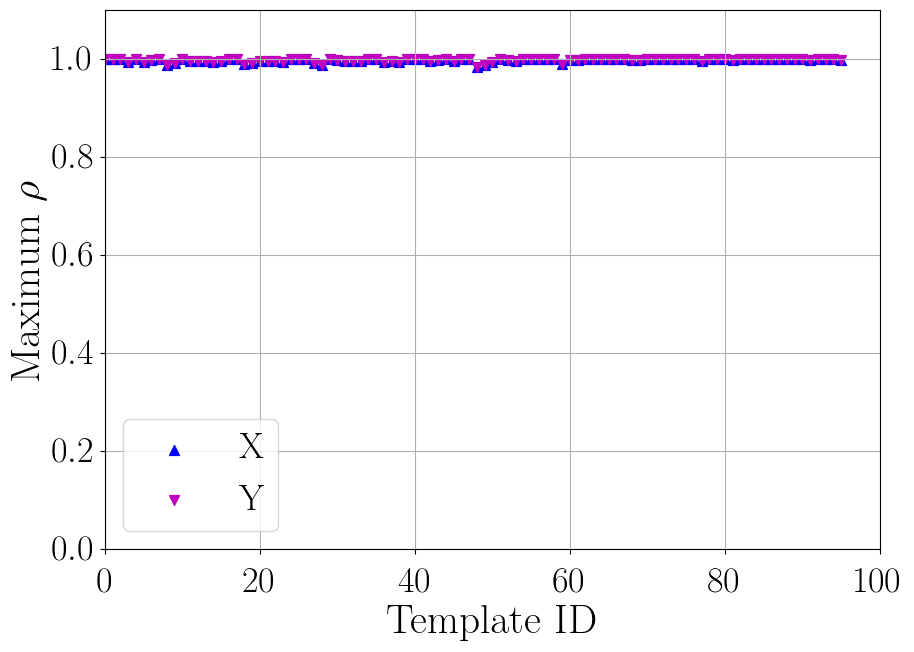

In [9]:
template_ids = np.arange(n_templates)

plt.scatter(template_ids,corr_max_x,marker='^',s=50,color='b',label='X')
plt.scatter(template_ids,corr_max_y,marker='v',s=50,color='m',label='Y')

plt.xlim([0,100])
plt.ylim([0,1.1])

plt.xlabel('Template ID')
plt.ylabel(r'Maximum $\rho$')

plt.legend(frameon=True,framealpha=.8)

plt.show()

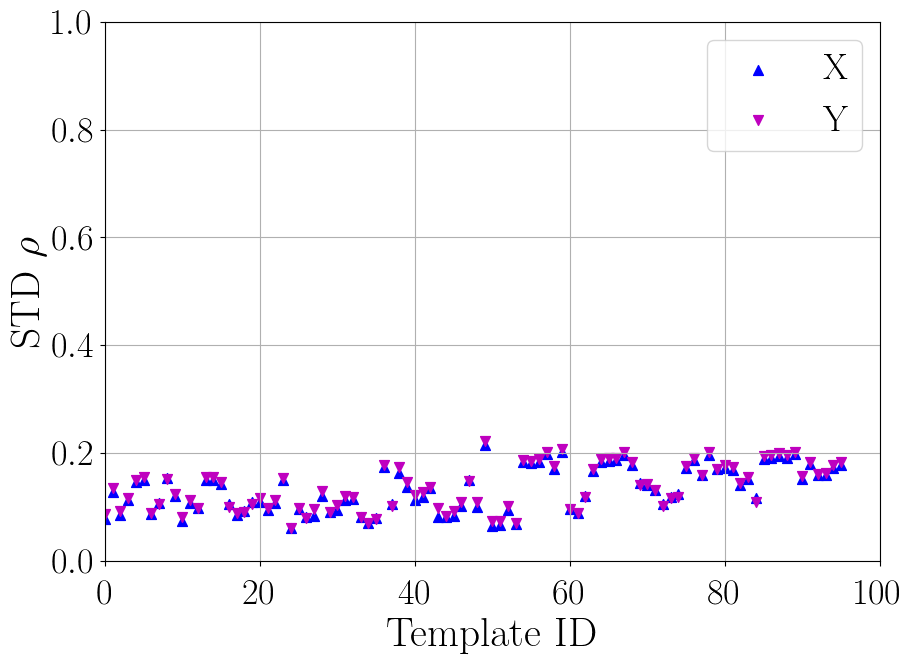

In [10]:
template_ids = np.arange(n_templates)

plt.scatter(template_ids,corr_std_x,marker='^',s=50,color='b',label='X')
plt.scatter(template_ids,corr_std_y,marker='v',s=50,color='m',label='Y')

plt.xlim([0,100])
plt.ylim([0,1])

plt.xlabel('Template ID')
plt.ylabel(r'STD $\rho$')

plt.legend(frameon=True,framealpha=.8)

plt.show()

In [30]:
corr_max_x

array([0.70761166, 0.70805254, 0.70758534, 0.70341552, 0.70808271,
       0.70360217, 0.8239052 , 0.71294629, 0.70258074, 0.83097299,
       0.70765575, 0.7046312 , 0.70507228, 0.70467281, 0.70333986,
       0.70429021, 0.71155106, 0.79916566, 0.70390832, 0.7046545 ,
       0.70415976, 0.7039598 , 0.703736  , 0.7030261 , 0.70920349,
       0.82403196, 0.71067256, 0.70518482, 0.70642096, 0.7164484 ,
       0.70590799, 0.70514319, 0.7064317 , 0.70501953, 0.7089977 ,
       0.71005909, 0.84947938, 0.70729339, 0.70548608, 0.72454306,
       0.70754168, 0.70752362, 0.86231182, 0.70642619, 0.71052186,
       0.7080262 , 0.71162482, 0.71492568, 0.70011058, 0.71158672,
       0.70359884, 0.70752968, 0.70542369, 0.70573058, 0.81755593,
       0.85852119, 0.86842698, 0.7109651 , 0.90320866, 0.72441529,
       0.80391502, 0.81380711, 0.7076617 , 0.80151984, 0.82907923,
       0.81355698, 0.82013853, 0.84555244, 0.85609444, 0.71082151,
       0.70765746, 0.70794707, 0.70812708, 0.70778625, 0.70803

In [3]:
np.sqrt(2)/2

0.7071067811865476